# MAT022 Foundations of Statistics and Data Science

In [1]:
# libraries
library(ggplot2)
library(dplyr)
library(hrbrthemes)
library(viridis)
library(gridExtra)
library(ggpubr)
library(Hmisc)   

In [161]:
# Read data
setwd('C:/Users/c2098580/OneDrive - Cardiff University/Documents/MAT022/Coursework/Data')
nba_data <- read.csv('nbadata.csv', header=TRUE)

In [3]:
#Prelim analysis
head(nba_data)
sapply(nba_data, class)
nrow(nba_data)
ncol(nba_data)


GAME_ID,DATE,HOME_TEAM,AWAY_TEAM,PLAYER_NAME,PLAYER_ID,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,...,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_ID,CLOSE_DEF_DIST,FGM,PTS
21400001,"OCT 28, 2014",NOP,ORL,Omer Asik,201600,H,W,17,1,...,0,0.8,3.6,2,made,Nikola Vucevic,202696,1.7,1,2
21400001,"OCT 28, 2014",NOP,ORL,Omer Asik,201600,H,W,17,2,...,1,2.9,0.9,2,missed,Kyle O'Quinn,203124,2.0,0,0
21400001,"OCT 28, 2014",NOP,ORL,Omer Asik,201600,H,W,17,3,...,0,0.6,0.8,2,made,Tobias Harris,202699,2.6,1,2
21400001,"OCT 28, 2014",NOP,ORL,Omer Asik,201600,H,W,17,4,...,0,0.6,3.4,2,missed,Evan Fournier,203095,1.5,0,0
21400001,"OCT 28, 2014",NOP,ORL,Omer Asik,201600,H,W,17,5,...,0,0.8,2.6,2,made,Dewayne Dedmon,203473,4.5,1,2
21400001,"OCT 28, 2014",NOP,ORL,Omer Asik,201600,H,W,17,6,...,0,1.1,2.7,2,made,Dewayne Dedmon,203473,1.7,1,2


GAME_ID                DATE           HOME_TEAM           AWAY_TEAM 
          "integer"            "factor"            "factor"            "factor" 
        PLAYER_NAME           PLAYER_ID            LOCATION                   W 
           "factor"           "integer"            "factor"            "factor" 
       FINAL_MARGIN         SHOT_NUMBER              PERIOD          GAME_CLOCK 
          "integer"           "integer"           "integer"            "factor" 
         SHOT_CLOCK            DRIBBLES          TOUCH_TIME           SHOT_DIST 
          "numeric"           "integer"           "numeric"           "numeric" 
           PTS_TYPE         SHOT_RESULT    CLOSEST_DEFENDER CLOSEST_DEFENDER_ID 
          "integer"            "factor"            "factor"           "integer" 
     CLOSE_DEF_DIST                 FGM                 PTS 
          "numeric"           "integer"           "integer"

[1] 128069

[1] 23

In [4]:
summary(nba_data)

    GAME_ID                   DATE          HOME_TEAM       AWAY_TEAM     
 Min.   :21400001   JAN 07, 2015:  1941   SAC    : 4889   PHX    :  4793  
 1st Qu.:21400233   JAN 16, 2015:  1875   CHI    : 4875   GSW    :  4774  
 Median :21400449   NOV 26, 2014:  1822   LAC    : 4708   LAL    :  4645  
 Mean   :21400452   DEC 12, 2014:  1784   ATL    : 4707   IND    :  4615  
 3rd Qu.:21400673   FEB 27, 2015:  1784   WAS    : 4655   SAS    :  4603  
 Max.   :21400908   JAN 21, 2015:  1775   BOS    : 4599   OKC    :  4575  
                    (Other)     :117088   (Other):99636   (Other):100064  
            PLAYER_NAME       PLAYER_ID      LOCATION  W        
 James Harden     :  1054   Min.   :   708   A:64135   L:63474  
 Mnta Ellis       :  1052   1st Qu.:101162   H:63934   W:64595  
 Lamarcus Aldridge:  1050   Median :201939                      
 Damian Lillard   :   986   Mean   :157238                      
 Lebron James     :   978   3rd Qu.:202704                      
 Klay Thom

#### Looking at the data I would like to investigate:

why is final margin mean not 0

SHOT_CLOCK 5567 NAs

TOUCH_TIME minimum is -163.600

TOUCH TIME BIGGER THAN 24

2 point distance longer than the minimum 3 point shot

vice versa

#### NA shot clock

In [5]:
#check for any NA values
for (i in 1:ncol(nba_data)) {
    print(anyNA(nba_data[,i]))
    print(i)
    }
# NA values in 13th column SHOT_CLOCK
#Isolate NA values
na_shotclock <- nba_data[is.na(nba_data$SHOT_CLOCK),]
nrow(na_shotclock)

[1] FALSE
[1] 1
[1] FALSE
[1] 2
[1] FALSE
[1] 3
[1] FALSE
[1] 4
[1] FALSE
[1] 5
[1] FALSE
[1] 6
[1] FALSE
[1] 7
[1] FALSE
[1] 8
[1] FALSE
[1] 9
[1] FALSE
[1] 10
[1] FALSE
[1] 11
[1] FALSE
[1] 12
[1] TRUE
[1] 13
[1] FALSE
[1] 14
[1] FALSE
[1] 15
[1] FALSE
[1] 16
[1] FALSE
[1] 17
[1] FALSE
[1] 18
[1] FALSE
[1] 19
[1] FALSE
[1] 20
[1] FALSE
[1] 21
[1] FALSE
[1] 22
[1] FALSE
[1] 23


[1] 5567

5567 rows have NA values for shot clock 

This is 5567 / 128069 = 4.3% of the shot clock data 

Missing completely at random

I will replace the data with the mean of the shot clock column

In [7]:
nba_data[is.na(nba_data[,13]), 13] <- mean(nba_data[,13], na.rm = TRUE)

#### touch time

##### minus touch time

In [8]:
minus_touchtime <- nba_data[nba_data$TOUCH_TIME < 0,]
nrow(minus_touchtime)

[1] 312

312 rows have negative touchtime values

Cannot be negative as 'TOUCH_TIME is the TIME that the ball was in the shooting player’s hand'

This is 312 / 128069 = 0.24% of the touchtime data. Since this represents a small amount of the data it will be removed from the dataset.

try to see if it is a error in typing (negative time instead of positive)

In [9]:
nba_data <- nba_data[nba_data$TOUCH_TIME > 0,]

###### touch time over 24 seconds

In [162]:
sum(nba_data$TOUCH_TIME > 24)

[1] 4

There are 4 instances of the touch time being over 24 seconds, which is impossible. This data will be removed

In [11]:
nba_data <- nba_data[nba_data$TOUCH_TIME <= 24,]

#### mean of final margin != 0

First look if there is duplicate values

In [12]:
nba_data[duplicated(nba_data,MARGIN=1),]

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"

GAME_ID,DATE,HOME_TEAM,AWAY_TEAM,PLAYER_NAME,PLAYER_ID,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,...,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_ID,CLOSE_DEF_DIST,FGM,PTS


No duplicate values

Take as error in the dataset

#### 2 pointers recorded as 3

In the nba the shortest possible 3 pointer is 22 feet from the hoop. However using 

In [13]:
nrow(nba_data[nba_data$PTS_TYPE == 3 & nba_data$SHOT_DIST < 22,])

[1] 818

There are 872 instances of a 3 point shot being shot shorter than the minimum possible 3 pointer

Could this is be an error in the measurement of the distance the shot is taken?

'The distance of the shot is likely measured from where the ball leaves the player's hands by using multiple cameras to triangulate the ball position. A player's hands may be a couple of feet beyond his feet at release. I would also guess that the technology is not always perfect…this data is from about the time the NBA began to use this technology.'

Look at the 2 point shots that are longer than the maximum 2 pont distance 23.75 feet

In [14]:
nrow(nba_data[nba_data$PTS_TYPE == 2 & nba_data$SHOT_DIST > 23.75,])

[1] 490

Change the error 2s to 3s and vice versa 

In [15]:
# change pts type from 3 to 2 for too short shots
nba_data$PTS_TYPE[nba_data$PTS_TYPE == 3 & nba_data$SHOT_DIST < 22] <- 2

# pts from 3 to 2 for too short shots
nba_data$PTS[nba_data$PTS_TYPE == 3 & nba_data$SHOT_DIST < 22] <- 2

In [16]:
# change pts type from 2 to 3 for too long shots
nba_data$PTS_TYPE[nba_data$PTS_TYPE == 2 & nba_data$SHOT_DIST > 23.75] <- 3

# pts from 2 to 3 for too long shots
nba_data$PTS[nba_data$PTS_TYPE == 2 & nba_data$SHOT_DIST > 23.75] <- 3

#### game clock is a factor not a numerical value

In [17]:
# GAME_CLOCK is a factor, not a numeric vector need to transform it first
nba_data$GAME_CLOCK <-as.numeric(nba_data[,'GAME_CLOCK'])

## EDA

In [18]:
head(nba_data)
sapply(nba_data, class)
nrow(nba_data)
ncol(nba_data)
summary(nba_data)

GAME_ID,DATE,HOME_TEAM,AWAY_TEAM,PLAYER_NAME,PLAYER_ID,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,...,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_ID,CLOSE_DEF_DIST,FGM,PTS
21400001,"OCT 28, 2014",NOP,ORL,Omer Asik,201600,H,W,17,1,...,0,0.8,3.6,2,made,Nikola Vucevic,202696,1.7,1,2
21400001,"OCT 28, 2014",NOP,ORL,Omer Asik,201600,H,W,17,2,...,1,2.9,0.9,2,missed,Kyle O'Quinn,203124,2.0,0,0
21400001,"OCT 28, 2014",NOP,ORL,Omer Asik,201600,H,W,17,3,...,0,0.6,0.8,2,made,Tobias Harris,202699,2.6,1,2
21400001,"OCT 28, 2014",NOP,ORL,Omer Asik,201600,H,W,17,4,...,0,0.6,3.4,2,missed,Evan Fournier,203095,1.5,0,0
21400001,"OCT 28, 2014",NOP,ORL,Omer Asik,201600,H,W,17,5,...,0,0.8,2.6,2,made,Dewayne Dedmon,203473,4.5,1,2
21400001,"OCT 28, 2014",NOP,ORL,Omer Asik,201600,H,W,17,6,...,0,1.1,2.7,2,made,Dewayne Dedmon,203473,1.7,1,2


GAME_ID                DATE           HOME_TEAM           AWAY_TEAM 
          "integer"            "factor"            "factor"            "factor" 
        PLAYER_NAME           PLAYER_ID            LOCATION                   W 
           "factor"           "integer"            "factor"            "factor" 
       FINAL_MARGIN         SHOT_NUMBER              PERIOD          GAME_CLOCK 
          "integer"           "integer"           "integer"           "numeric" 
         SHOT_CLOCK            DRIBBLES          TOUCH_TIME           SHOT_DIST 
          "numeric"           "integer"           "numeric"           "numeric" 
           PTS_TYPE         SHOT_RESULT    CLOSEST_DEFENDER CLOSEST_DEFENDER_ID 
          "numeric"            "factor"            "factor"           "integer" 
     CLOSE_DEF_DIST                 FGM                 PTS 
          "numeric"           "integer"           "numeric"

[1] 124707

[1] 23

    GAME_ID                   DATE          HOME_TEAM       AWAY_TEAM    
 Min.   :21400001   JAN 07, 2015:  1897   SAC    : 4771   PHX    : 4666  
 1st Qu.:21400234   JAN 16, 2015:  1821   CHI    : 4692   GSW    : 4648  
 Median :21400449   NOV 26, 2014:  1773   ATL    : 4592   LAL    : 4534  
 Mean   :21400452   FEB 27, 2015:  1744   LAC    : 4577   IND    : 4519  
 3rd Qu.:21400673   DEC 12, 2014:  1741   WAS    : 4543   SAS    : 4488  
 Max.   :21400908   JAN 21, 2015:  1730   BOS    : 4510   BKN    : 4468  
                    (Other)     :114001   (Other):97022   (Other):97384  
            PLAYER_NAME       PLAYER_ID      LOCATION  W        
 Mnta Ellis       :  1043   Min.   :   708   A:62457   L:61770  
 James Harden     :  1042   1st Qu.:101162   H:62250   W:62937  
 Lamarcus Aldridge:  1005   Median :201939                      
 Damian Lillard   :   976   Mean   :157107                      
 Klay Thompson    :   963   3rd Qu.:202704                      
 Lebron James     

## Visual EDA

### 3 point made 3 point attempted plot

plot a graph of 3 point percentage vs 3 point attempts for each player

In [19]:
columns <- c('PLAYER_NAME')
three_attempts <- nba_data[nba_data$PTS_TYPE == 3, columns]
three_made <- nba_data[nba_data$PTS_TYPE == 3 & nba_data$FGM == 1, columns]
player_attempts <- as.data.frame(table(three_attempts))
player_made <- as.data.frame(table(three_made))


Rate Statistic Requirements(https://www.basketball-reference.com/about/rate_stat_req.html)

To qualify for three-point field goal percentage (3P%) the following minimums are required:
2013-14 to present NBA  82 3P

i.e the player must have at least 82 three-point field goals made.

In [20]:
triple_df <- data.frame(player_attempts[,1], player_made[,2], player_attempts[,2])
triple_df <- transform(triple_df, percentage = player_made[,2]/player_attempts[,2])
#subset so 3 pointers made >= 82
triple_df <- triple_df[triple_df[,2]>=82,]

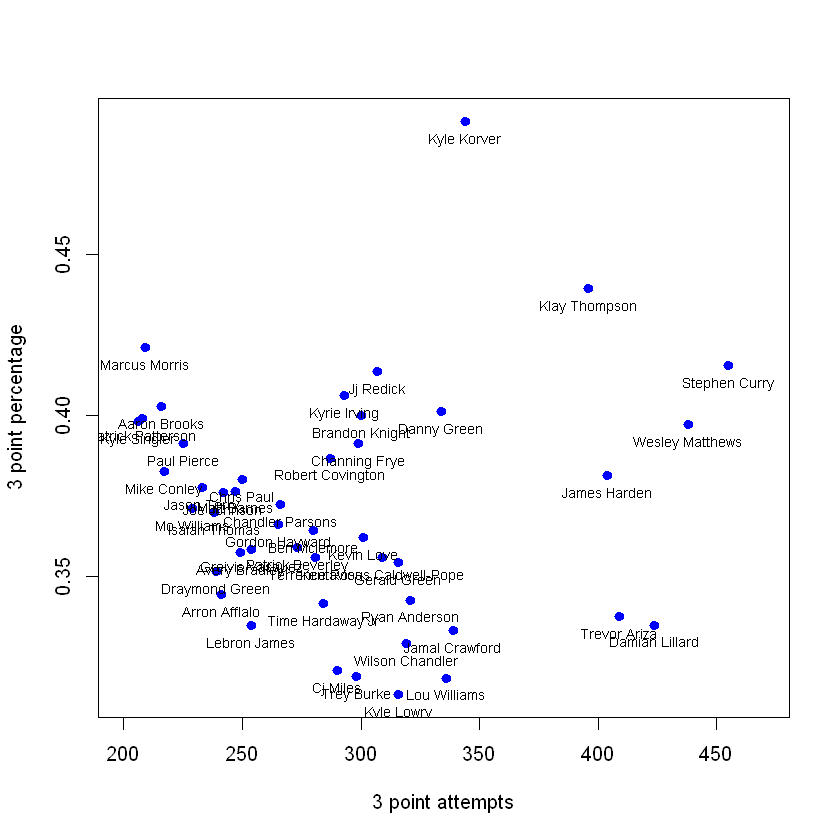

In [21]:
#plot the data 
plot(triple_df[,3],triple_df[,4],col= "blue", pch = 19, cex = 1, lty = "solid", lwd = 2,xlim= c(200,470), xlab=('
3 point attempts'), ylab=('3 point percentage'))
text(triple_df[,3],triple_df[,4], labels=triple_df[,1], cex=0.7, pos=1)

In [22]:
#install.packages('dplyr')
#install.packages('hrbrthemes')
#install.packages('viridis')

In [1]:


# bubble plot
triple_df %>%
  ggplot(aes(x=triple_df[,3], y=triple_df[,4])) +
    geom_point(aes(x=triple_df[,3], y=triple_df[,4], size = triple_df[,2],
                   color=triple_df[,2]),alpha=0.7) +
    scale_size(range = c(.0001, 15), name="3 Point Shots Made") +
    geom_text(aes(x=triple_df[,3], y=triple_df[,4], label = triple_df[,1]),
         size = 3,)+
    ylab("3 Point Percentage") +
    xlab("3 Point Attempts") +
    xlim(200,460) +
    theme(legend.position = "none")


ERROR: Error in triple_df %>% ggplot(aes(x = triple_df[, 3], y = triple_df[, : could not find function "%>%"


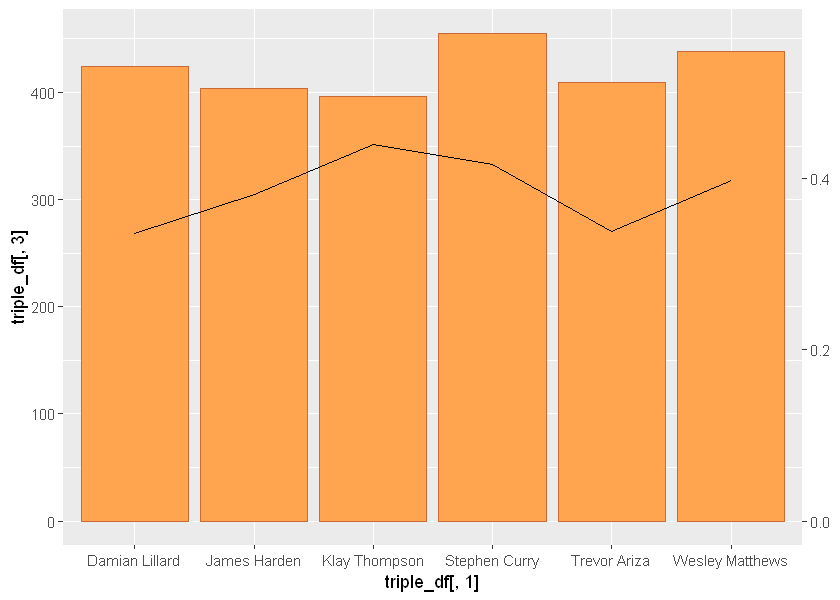

In [24]:
options(repr.plot.width=7, repr.plot.height=5)

#subset to get players with more than 350 attempts
triple_df <- triple_df[triple_df[,3]>=350,]

ggplot(triple_df)  + 
    geom_bar(aes(x=triple_df[,1], y=triple_df[,3]),stat="identity", fill="tan1", colour="sienna3")+
    geom_line(aes(x=triple_df[,1], y=triple_df[,4]*800,group=1))+
    #geom_text(aes(label=triple_df[,1], x=triple_df[,3], y=Rate*max(df$Response)), colour="black")+
    #geom_text(aes(label=Response, x=Year, y=0.95*Response), colour="black")+
    scale_y_continuous(sec.axis = sec_axis(~./800))

### Contested makes 

In [25]:
# subset nba data to get the shooting player and the fgm
def <- c('PLAYER_NAME','FGM', 'CLOSE_DEF_DIST','PTS_TYPE')
def_df <- nba_data[,def]

According to NBA.com/stats, a "wide open" 3-pointer happens with six or more feet of room between the shooter and the defender. An "open" 3-pointer happens with 4-6 feet of room, a "tightly" contested 3-pointer comes with 2-4 feet of room and a "very tightly" contested 3-pointer comes with 0-2 feet of room.

Therefore I will delete data with CLOSE_DEF_DIST > 6 feet, as the defender is not really affecting the shot.

In [26]:
# subset to get contested made 3 point shots
def_df <- def_df[def_df$CLOSE_DEF_DIST < 6 & def_df$PTS_TYPE == 3 &
                 def_df$FGM == 1,]

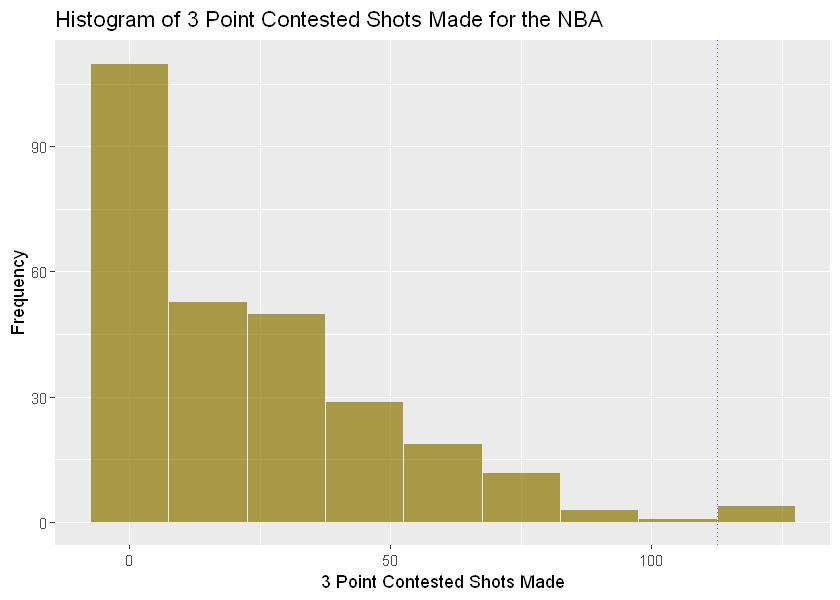

In [27]:
# count the number of shots affected by each player 
contest_df <- as.data.frame(table(def_df[,1]))

#plot in histogram
ggplot(contest_df, aes(x=contest_df[,2])) + 
  geom_histogram(binwidth=15, fill="gold4", color="#e9ecef", alpha=0.7,position = 'identity') +
   ylab("Frequency") +
    xlab("3 Point Contested Shots Made") +
    ggtitle("Histogram of 3 Point Contested Shots Made for the NBA") +
    geom_vline(aes(xintercept = 112.5),colour = 'royalblue1',linetype="dotted")


In [28]:
#subset for the best defenders
bestdef_df <- contest_df[contest_df$Freq > 101,]
bestdef_df

,Var1,Freq
109,James Harden,123
158,Klay Thompson,125
163,Kyle Korver,116
248,Stephen Curry,117


### Points per shot 

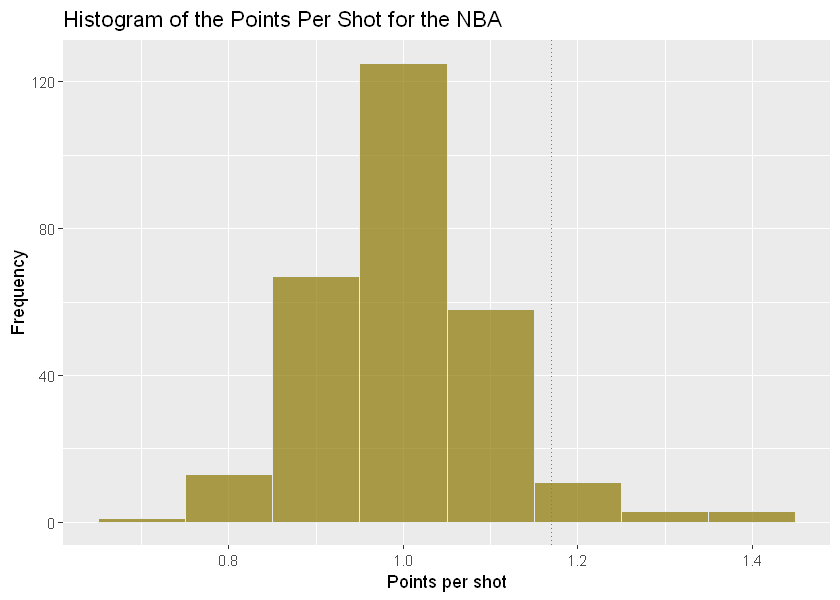

In [163]:
# nba points scored
nba_points <- (nba_data[,c('PLAYER_NAME','PTS')])
# add all the points scored 
nba_points <- aggregate(nba_points$PTS,by=list(Category=nba_points$PLAYER_NAME), FUN=sum)
#nba number of attempts
nba_attempts <- data.frame(table(nba_data[,'PLAYER_NAME']))
nba_points$attempts <- nba_attempts[,2]
# calculate pps
nba_points$nba_pps <- nba_points[,2] / nba_points[,3]
# plot histogram
ggplot(nba_points, aes(x=nba_points[,4])) + 
  geom_histogram(binwidth=0.10, fill="gold4", color="#e9ecef", alpha=0.7,position = 'identity') +
   ylab("Frequency") +
    xlab("Points per shot") +
    ggtitle("Histogram of the Points Per Shot for the NBA") +
    geom_vline(aes(xintercept = 1.17),colour = 'royalblue1',linetype="dotted")

In [181]:
top15 <- nba_points[nba_points$nba_pps > 1.160,]
top15 <- top15[,c(1,4)]
ranked <- top15[order(-as.numeric(top15[,2])),]
ranked$rank <- NA
ranked$rank <- 1:nrow(ranked)
data.frame(ranked[1:15,1:2],row.names=ranked[,3])

Category,nba_pps
Deandre Jordan,1.424936
Tyson Chandler,1.352941
Kyle Korver,1.351464
Luke Babbitt,1.269231
James Johnson,1.260450
Rudy Gobert,1.250936
Greg Smith,1.234043
Ed Davis,1.205714
Alexis Ajinca,1.194313
Amir Johnson,1.194030


### Shot distance

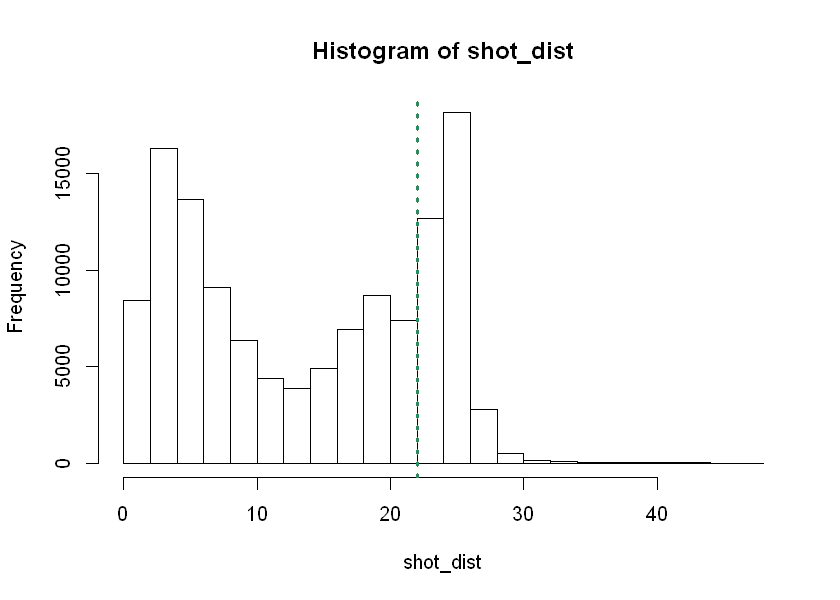

In [30]:
shot_dist <- nba_data[,'SHOT_DIST']
hist(shot_dist)
#minimum 3 point distance 
abline(v=22, lty=3, lwd=3, col='seagreen')

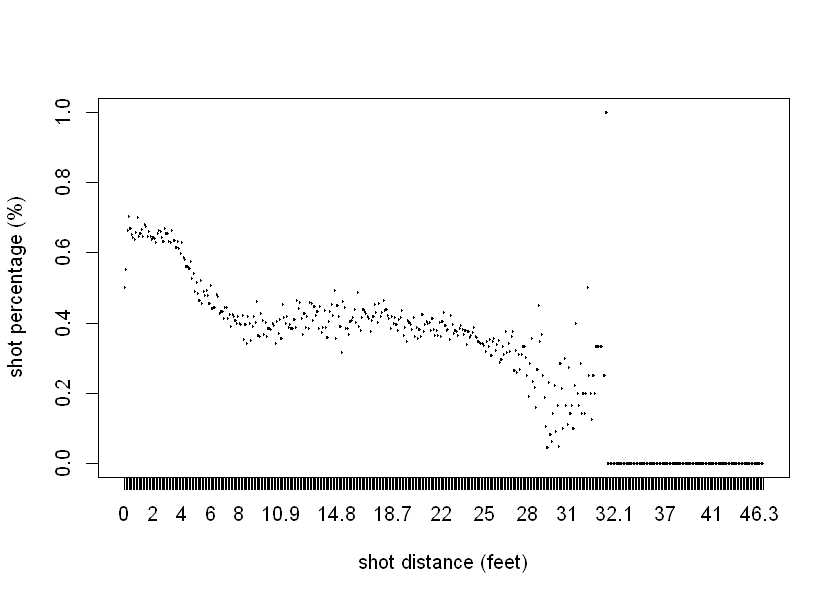

In [31]:
shot_dist_fgm <- nba_data[,c('SHOT_DIST', 'FGM')]

#find amount of shots made and missed from each distance
shot_dist_made <- shot_dist_fgm[shot_dist_fgm$FGM == 1, 'SHOT_DIST']
shot_dist_made <- as.data.frame(table(shot_dist_made))

shot_dist_missed <- shot_dist_fgm[shot_dist_fgm$FGM == 0, 'SHOT_DIST']
shot_dist_missed <- as.data.frame(table(shot_dist_missed))

shot_dist_total <- merge(shot_dist_made,shot_dist_missed,by.x='shot_dist_made',by.y='shot_dist_missed', all=TRUE,
                        suffixes = c(" made"," missed"))

#replace missing values with 0
shot_dist_total [is.na(shot_dist_total )] <- 0

shot_dist_percent <- shot_dist_total[,2] / (shot_dist_total[,2] + shot_dist_total[,3])

#plot
plot(shot_dist_total[,1],shot_dist_percent, xlab='shot distance (feet)', ylab='shot percentage (%)')

The closer you are to the basket the more likely the shot will go in. 


#### Catch and shoot

NBA definition of catch & shoot, namely “Any jump shot outside of 10 feet where a player possessed the ball for 2 seconds or less and took no dribbles.

https://causalkathy.com/2017/01/31/lets-talk-catch-shoot/#:~:text=To%20answer%20this%20question%2C%20I,this%20definition%20down%20a%20little.

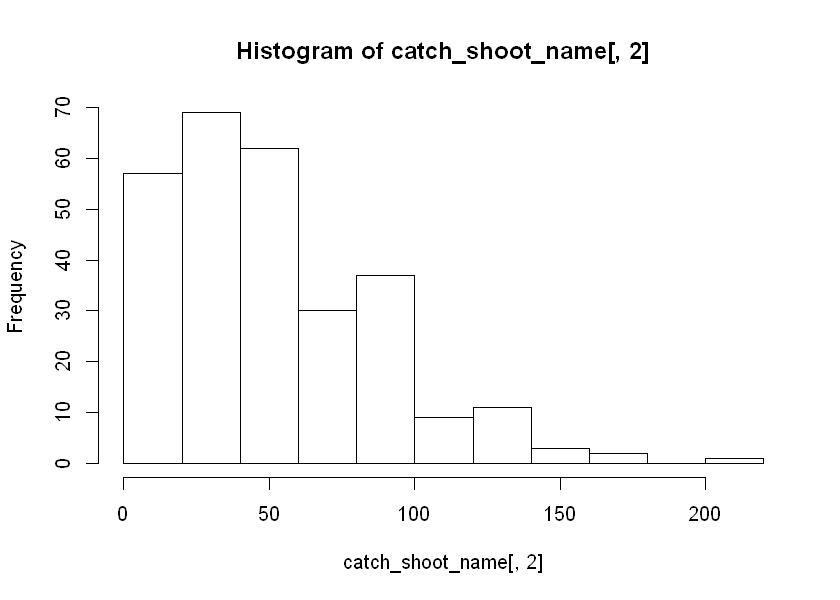

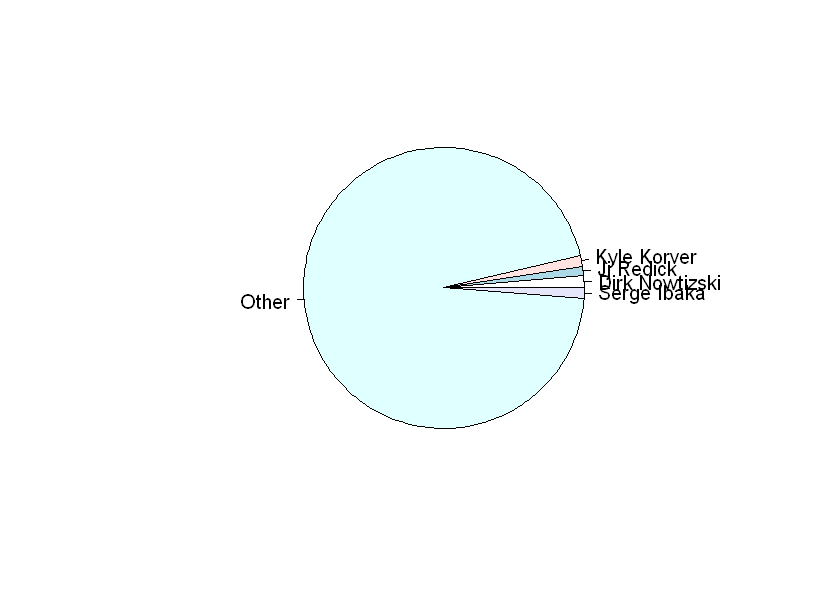

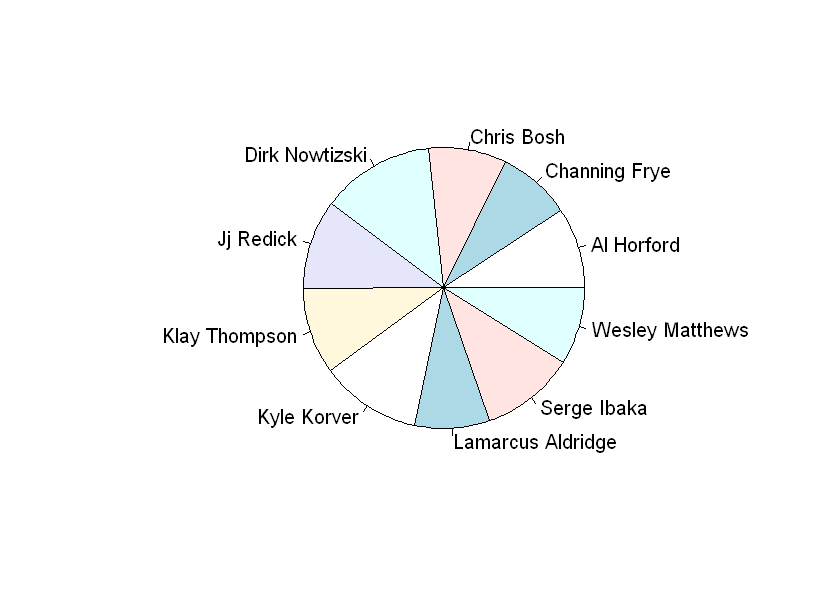

In [32]:
#subset the nba data for catch and shoot shots
catch_shoot <- nba_data[nba_data$DRIBBLES == 0 & nba_data$TOUCH_TIME <= 2 & nba_data$SHOT_DIST > 10 & 
                        nba_data$FGM == 1,'PLAYER_NAME']

#count the name for each player
catch_shoot_name <- data.frame(table(catch_shoot))


#histogram of the data
hist(catch_shoot_name[,2])

#top catch and shoot players
top_catch_shoot <- catch_shoot_name[catch_shoot_name$Freq > 130,] 


#players with less than 300 catch and shoot shots categorise them as 'other'
catch_shoot_name$catch_shoot <- as.character(catch_shoot_name$catch_shoot)
catch_shoot_name[catch_shoot_name$Freq < 160,1] = 'Other'
catch_shoot_name$catch_shoot <- factor(catch_shoot_name$catch_shoot)

#count the number of other
catch_shoot_name <- aggregate(Freq~catch_shoot, FUN=sum,catch_shoot_name)

#pie chart of the data
pie(catch_shoot_name[,2],labels = catch_shoot_name[,1])
pie(top_catch_shoot[,2],labels = top_catch_shoot[,1])

#### Contested 3 point shots 

I will be looking at tightly contested and very tightly contested 3 point shots 

a "tightly" contested 3-pointer comes with 2-4 feet of room and a "very tightly" contested 3-pointer comes with 0-2 feet of room.

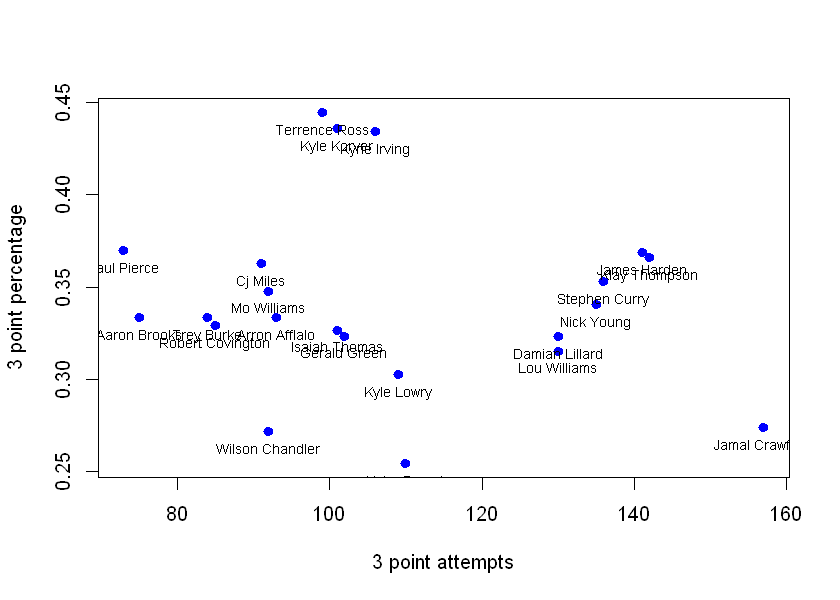

In [33]:
#subset to get contested 3 point shots 
contest_df <- nba_data[nba_data$CLOSE_DEF_DIST <= 4 & nba_data$PTS_TYPE == 3,]

#contest 3pointers attempted(made or missed)
contest_attempts <- contest_df[,'PLAYER_NAME']
# contested 3 pointers made
contest_made <- contest_df[contest_df$FGM == 1,'PLAYER_NAME']

#count for each player
contest_attempts_tot <- as.data.frame(table(contest_attempts))
contest_made_tot <- as.data.frame(table(contest_made))


#calculate shot percentage
contest_total <- data.frame(contest_attempts_tot[,1], contest_made_tot[,2], contest_attempts_tot[,2])
contest_total <- transform(contest_total, percentage = contest_made_tot[,2]/contest_attempts_tot[,2])

# at least 25 shots made
contest_total <- contest_total[contest_total[,2]>=25,]

#plot the data 
plot(contest_total[,3],contest_total[,4],col= "blue", pch = 19, cex = 1, lty = "solid", lwd = 2, xlab=('
3 point attempts'), ylab=('3 point percentage'))
text(contest_total[,3],contest_total[,4], labels=contest_total[,1], cex=0.7, pos=1)

### Clutch field goal percentage

To qualify for field goal percentage the player must have at least 300 field goals made

https://www.basketball-reference.com/about/rate_stat_req.html

,clutch_nba_attempts...1.,clutch_nba_makes...2.,clutch_nba_attempts...2.,percentage,rank
248,Stephen Curry,38,82,0.4634146,194


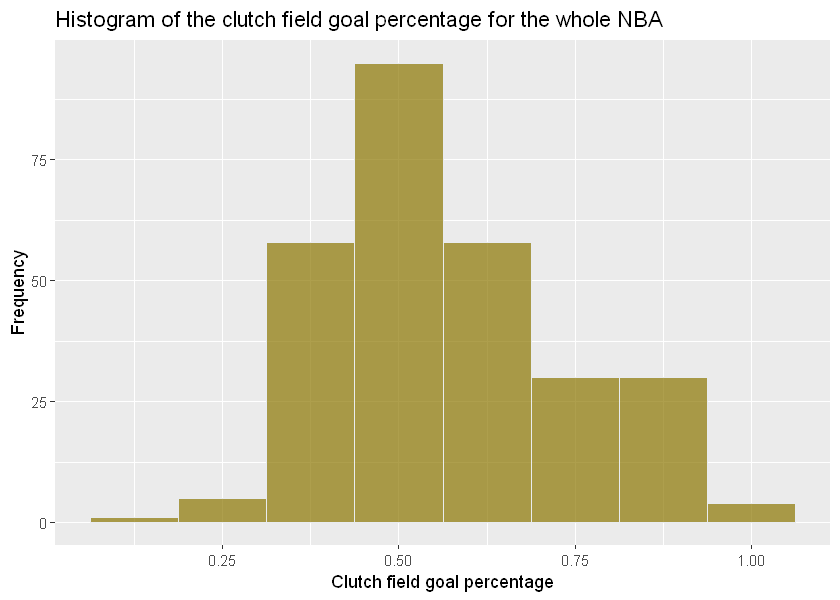

In [34]:
#subset the steph dataframe by last 5 minutes 4,5,6 or 7th period final margin less than 11 OR shot clock less than 1
# shot attempts
clutch_nba_attempts <- nba_data[(nba_data$GAME_CLOCK < 500 & nba_data$PERIOD > 3 & abs(nba_data$FINAL_MARGIN) < 11)
                                | nba_data$SHOT_CLOCK > 23 ,'PLAYER_NAME']
clutch_nba_attempts <- data.frame(table(clutch_nba_attempts))
                                  
#shots made
clutch_nba_makes <- nba_data[(nba_data$GAME_CLOCK < 500 & nba_data$PERIOD > 3 & abs(nba_data$FINAL_MARGIN) < 11 & nba_data$FGM == 1)| 
                        nba_data$SHOT_CLOCK > 23,'PLAYER_NAME']
                                 
clutch_nba_makes <- data.frame(table(clutch_nba_makes))   

# calc percentage
clutch_total <- data.frame(clutch_nba_attempts[,1], clutch_nba_makes[,2], clutch_nba_attempts[,2])
clutch_total <- transform(clutch_total, percentage = clutch_nba_makes[,2]/clutch_nba_attempts[,2])

# find where curry ranks in table
clutch_total <- clutch_total[order(-as.numeric(clutch_total[,4])),]
clutch_total$rank <- NA
clutch_total$rank <- 1:nrow(clutch_total)
clutch_total[clutch_total[,1]=='Stephen Curry',]

# plot histogram
ggplot(clutch_total, aes(x=clutch_total[,4])) + 
  geom_histogram(binwidth=0.125, fill="gold4", color="#e9ecef", alpha=0.7,position = 'identity') +
   ylab("Frequency") +
    xlab("Clutch field goal percentage") +
    ggtitle("Histogram of the clutch field goal percentage for the whole NBA") 

Stephen Curry ranks 194 out of 281 NBA players

# Stephen Curry

#### visualisation

In [35]:
# get data
steph_df <- nba_data[nba_data$PLAYER_NAME=='Stephen Curry',]
summary(steph_df)

    GAME_ID                   DATE       HOME_TEAM     AWAY_TEAM  
 Min.   :21400014   FEB 04, 2015: 26   GSW    :435   GSW    :518  
 1st Qu.:21400224   DEC 16, 2014: 24   MIN    : 42   OKC    : 37  
 Median :21400452   DEC 18, 2014: 24   HOU    : 36   SAS    : 35  
 Mean   :21400464   JAN 27, 2015: 23   UTA    : 36   HOU    : 27  
 3rd Qu.:21400715   DEC 13, 2014: 22   SAC    : 32   DAL    : 26  
 Max.   :21400907   FEB 11, 2015: 22   LAL    : 31   CHI    : 23  
                    (Other)     :812   (Other):341   (Other):287  
          PLAYER_NAME    PLAYER_ID      LOCATION W        FINAL_MARGIN    
 Stephen Curry  :953   Min.   :201939   A:518    L:196   Min.   :-14.000  
 Aaron Brooks   :  0   1st Qu.:201939   H:435    W:757   1st Qu.:  3.000  
 Aaron Gordon   :  0   Median :201939                    Median : 11.000  
 Al Farouq Aminu:  0   Mean   :201939                    Mean   :  9.494  
 Al Horford     :  0   3rd Qu.:201939                    3rd Qu.: 18.000  
 Al Jefferson 

470 FGM

498 FGnotM

#### shots per game 

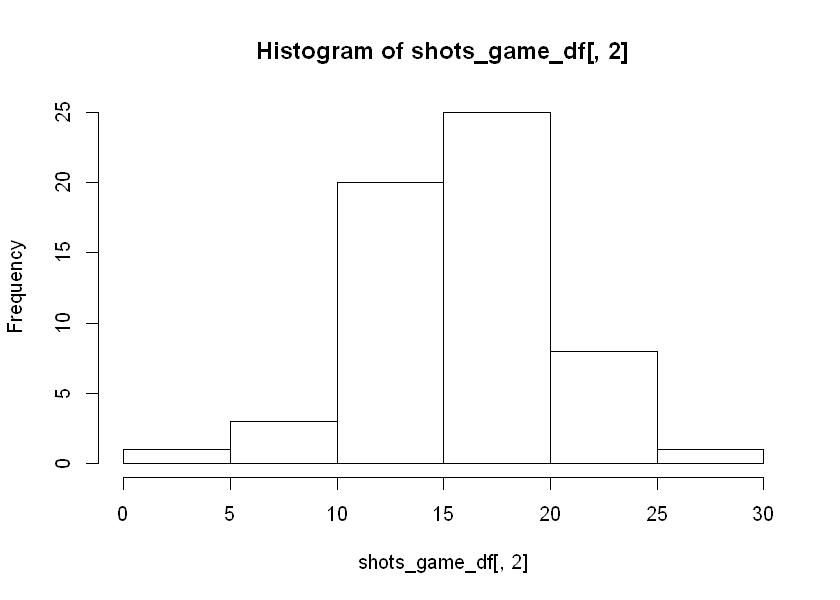

In [36]:
shots_game_col <- c('GAME_ID')
shots_game_df <- steph_df[,shots_game_col]
shots_game_df <- as.data.frame(table(shots_game_df))
hist(shots_game_df[,2])

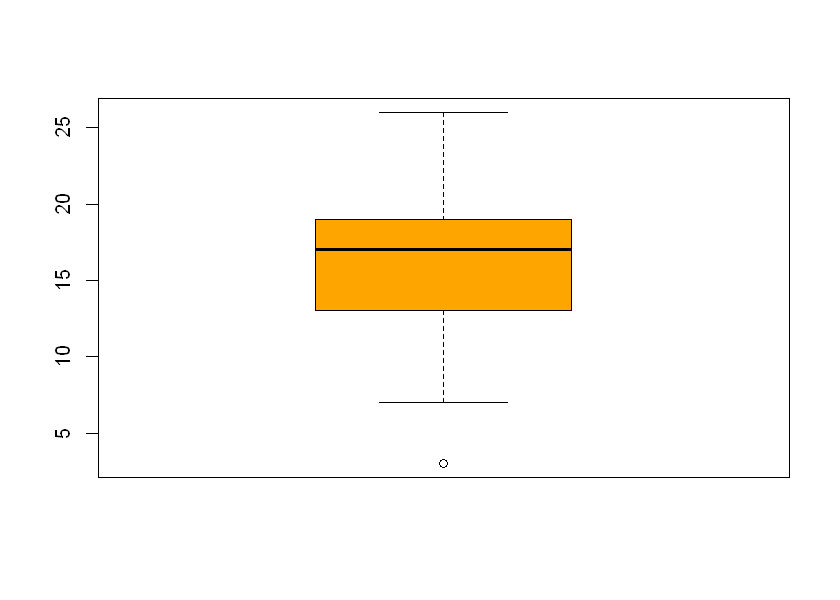

In [37]:
boxplot(shots_game_df[,2], col='orange')

#### shots made per game

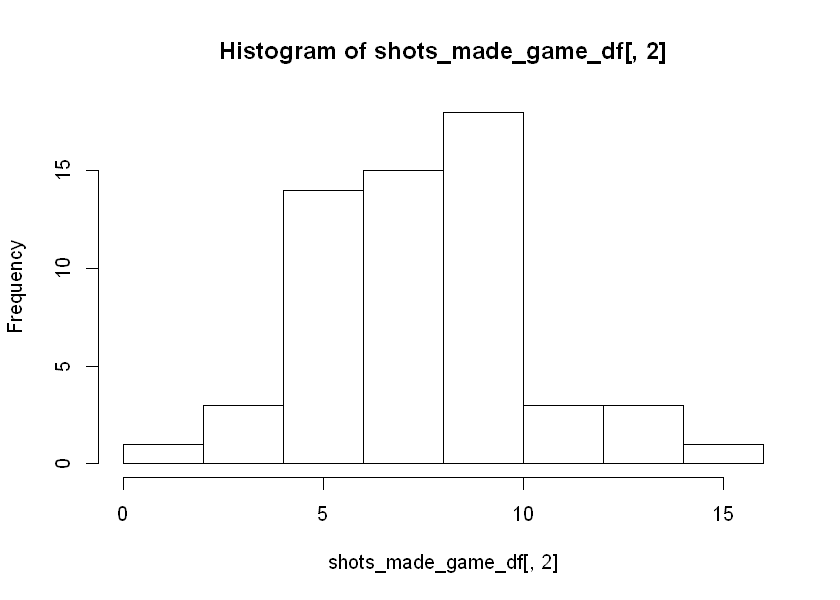

In [38]:
shots_made_game_df <- steph_df[steph_df$FGM == 1,shots_game_col]
shots_made_game_df <- as.data.frame(table(shots_made_game_df))
hist(shots_made_game_df[,2])

### Clutch shots made/missed

https://www.nba.com/stats/players/clutch-traditional/?sort=GP&dir=-1

Last 5 minutes, point diff = 5 pts or less is clutch time]

Can't do it, need the data of the point differential when the shot was taken

Try final margin < 11

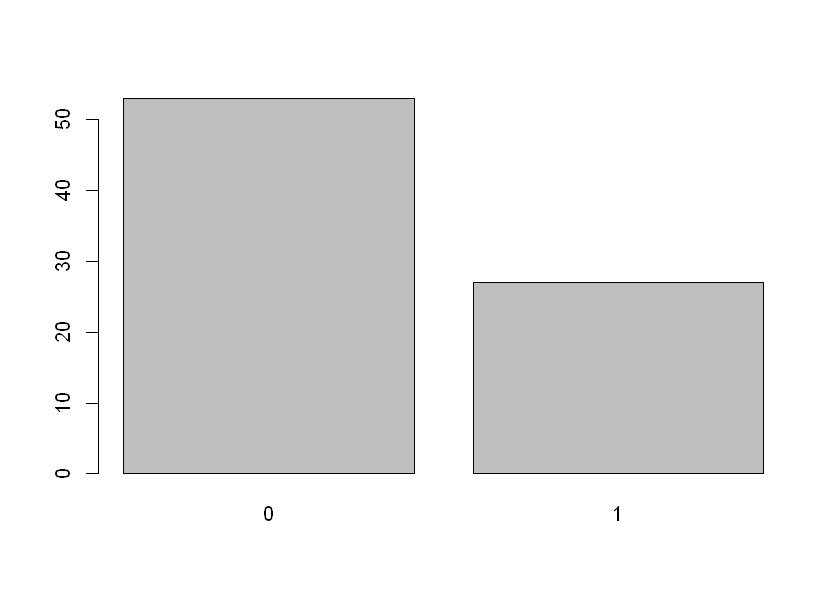

In [39]:
clutch_df <- steph_df[steph_df$GAME_CLOCK < 500 & steph_df$PERIOD > 3 & steph_df$FINAL_MARGIN < 8,'FGM']
barplot(table(clutch_df))

#### most defended by 

 Kemba Walker   : 23     
 Darren Collison: 21     
 Derrick Rose   : 21    
 Serge Ibaka    : 18      
 Zach LaVine    : 17    
 Kyrie Irving   : 16
 
 Let's visualise how many shots steph made against these defenders

,CLOSEST_DEFENDER,field_goal_missed,field_goal_made
101,Darren Collison,11,6
112,Derrick Rose,12,6
258,Kemba Walker,11,11
283,Kyrie Irving,5,7
405,Serge Ibaka,11,4
470,Zach LaVine,7,6


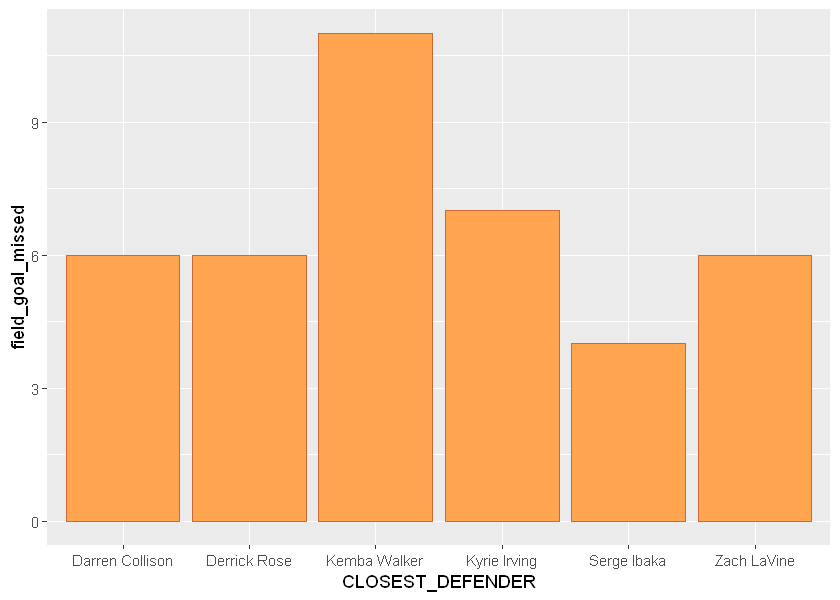

In [40]:
defenders <- c('Kemba Walker','Darren Collison','Derrick Rose','Serge Ibaka','Zach LaVine','Kyrie Irving')
# subset on the players who guarded steph the most, delete entries greater than 6 feet
sc_def_df <- steph_df[(steph_df$CLOSEST_DEFENDER=='Kemba Walker'|steph_df$CLOSEST_DEFENDER=='Darren Collison'|
                      steph_df$CLOSEST_DEFENDER=='Derrick Rose'|steph_df$CLOSEST_DEFENDER=='Serge Ibaka'|
                      steph_df$CLOSEST_DEFENDER=='Zach LaVine'|steph_df$CLOSEST_DEFENDER=='Kyrie Irving') &
                      steph_df$CLOSE_DEF_DIST<6,c('CLOSEST_DEFENDER','FGM')]

#freq for fgm=0/1 for each defender
freq_one <- as.data.frame(table(sc_def_df[sc_def_df$FGM==1,]))
freq_zero <- as.data.frame(table(sc_def_df[sc_def_df$FGM==0,]))
freq_one <- freq_one[freq_one$Freq!=0,]
freq_zero <- freq_zero[freq_zero$Freq!=0,]

#rename column
freq_one$field_goal_made <- freq_one$Freq
freq_one <- freq_one[,c(1,4)]
freq_zero$field_goal_missed <- freq_zero$Freq
freq_zero <- freq_zero[,c(1,4)]

#combine data frames
def_freq_df <- cbind(freq_zero,freq_one)
def_freq_df <- def_freq_df[,c(1,2,4)]
def_freq_df

#melt the data frame for plotting
#melted_def_df <- melt(def_freq_df,id.vars='Player name')

ggplot(def_freq_df, aes(CLOSEST_DEFENDER,field_goal_missed))  + 
    geom_bar(aes(CLOSEST_DEFENDER,field_goal_made),stat="identity", fill="tan1", colour="sienna3")

# Inferential analysis 

### Confidence intervals

#### shot attempts per game vs games won for steph curry

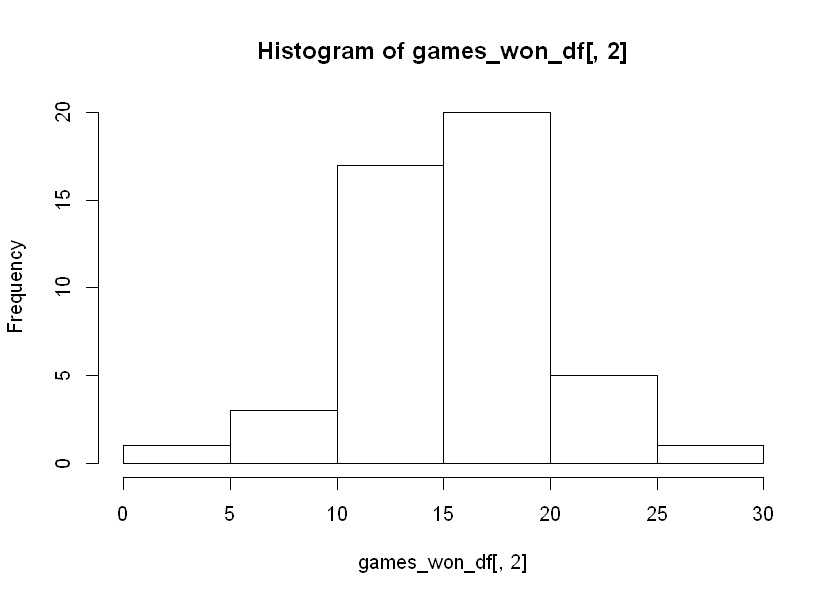

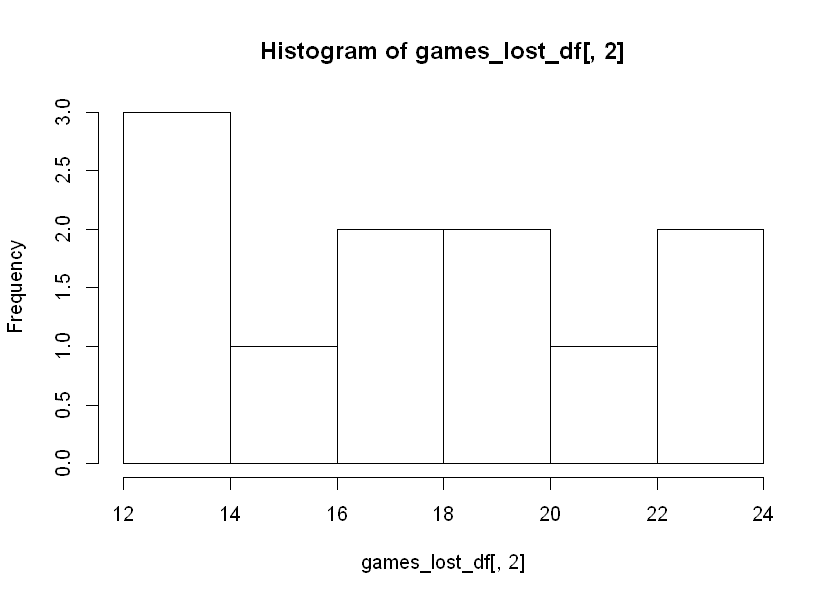

In [41]:
# shot attemps per game
shots_per_game <- steph_df[,'GAME_ID']
spg_df <- as.data.frame(table(shots_per_game))

#games won
games_won <- steph_df[steph_df$FINAL_MARGIN > 0,'GAME_ID']
games_won_df <- as.data.frame(table(games_won))

#games_lost
games_lost <- steph_df[steph_df$FINAL_MARGIN < 0,'GAME_ID']
games_lost_df <- as.data.frame(table(games_lost))

hist(games_won_df[,2])
hist(games_lost_df[,2])

### Confidence intervals for the mean shot attempts for games won and lost 

#### Games won

[1] 14.38387 17.82890
attr(,"conf.level")
[1] 0.99


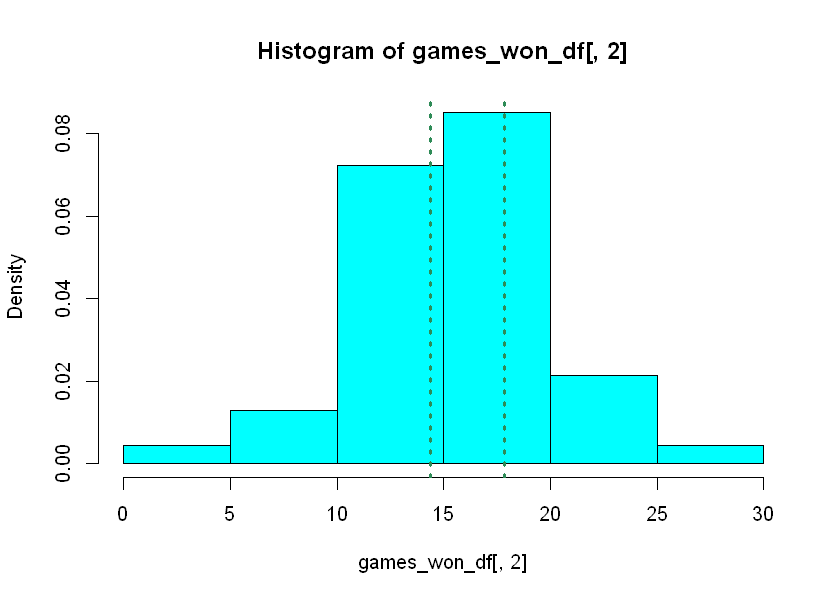

In [42]:
ci_games_won <- t.test(games_won_df[,2], conf.level=0.99)$conf.int
print(ci_games_won)
hist(games_won_df[,2], freq=FALSE, col='cyan')
abline(v=ci_games_won[1], lty=3, lwd=3, col='seagreen')
abline(v=ci_games_won[2], lty=3, lwd=3, col='seagreen')

#### games lost

[1] 13.92915 21.70721
attr(,"conf.level")
[1] 0.99


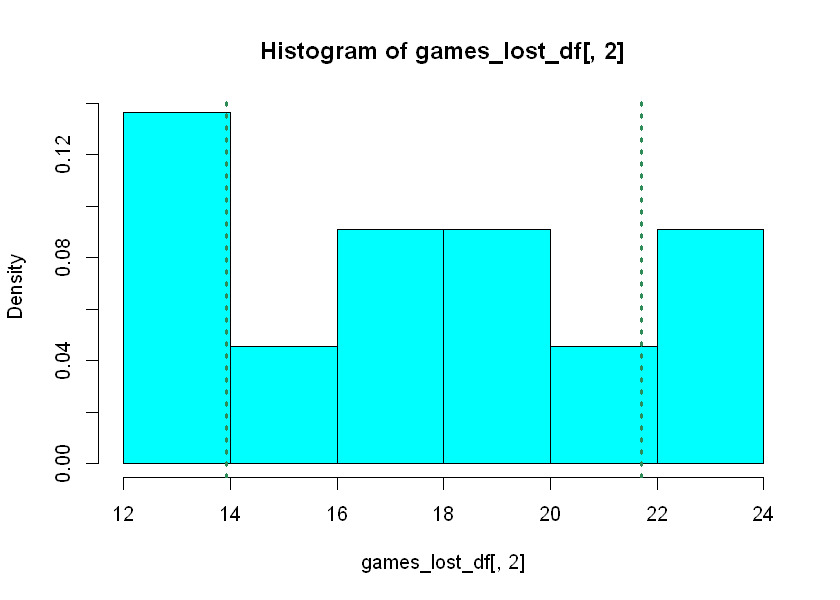

In [43]:
ci_games_lost <- t.test(games_lost_df[,2], conf.level=0.99)$conf.int
print(ci_games_lost)
hist(games_lost_df[,2], freq=FALSE, col='cyan')
abline(v=ci_games_lost[1], lty=3, lwd=3, col='seagreen')
abline(v=ci_games_lost[2], lty=3, lwd=3, col='seagreen')

steph may have more shot attempts in a loss

## Two-proportions z-test-

#### looking at steph vs rest of nba on proportion of 3 pointers made

The two-proportions z-test is used to compare two observed proportions.

Group A = Steph

p_A = 3pointers made $\div$ 3pointers attempted

Group B = Everyone but steph
   
p_B = 3pointers made $\div$ 3pointers attempted
     
whether the observed proportion of 3 pointer made in group A (pA) is greater than the observed proportion of 3 pointers made in group (pB)?

=> $H_0:p_A ≥ p_B$

=> $H_1:p_A < p_B$ 

http://www.sthda.com/english/wiki/two-proportions-z-test-in-r

In [44]:
#number of 3 point shots made for curry
pA_x <- nrow(steph_df[steph_df$PTS_TYPE == 3 & steph_df$FGM == 1,])
# number of 3 point attempts for curry
pA_n <- nrow(steph_df[steph_df$PTS_TYPE == 3,])
# number of 3 point shots made for the nba
pB_x <- nrow(nba_data[nba_data$PTS_TYPE == 3 & nba_data$FGM == 1 & nba_data$PLAYER_NAME!='Stephen Curry',])  
# number of 3 point attempts for the nba
pB_n <- nrow(nba_data[nba_data$PTS_TYPE == 3 & nba_data$PLAYER_NAME!='Stephen Curry',])

In [45]:
#3's missed
pA_m <- nrow(steph_df[steph_df$PTS_TYPE == 3 & steph_df$FGM == 0,])

pB_m <- nrow(nba_data[nba_data$PTS_TYPE == 3 & nba_data$FGM == 0 & nba_data$PLAYER_NAME!='Stephen Curry',])

In [46]:
# contingency table
con_table <- rbind(c(pA_x, pA_m), c(pB_x,pB_m))
colnames(con_table) <- c("3's Made","3's Missed")
rownames(con_table) <- c("Curry","NBA")

con_table

,3's Made,3's Missed
Curry,189,266
NBA,11509,21288


In [47]:
prop.test(con_table, alternative='less', conf.level=0.95, correct = FALSE)


	2-sample test for equality of proportions without continuity
	correction

data:  con_table
X-squared = 8.1793, df = 1, p-value = 0.9979
alternative hypothesis: less
95 percent confidence interval:
 -1.0000000  0.1027147
sample estimates:
   prop 1    prop 2 
0.4153846 0.3509162 


test for normality

We obtain a p-value of $ 0.9982$. At the significance level $ 𝛼=0.05 $ for instance, we retain  $𝐻_0$  for  $𝐻_1$  and we thus conclude that the data suggests that the proportion of Stephen Curry making a 3 pointer is greater than the rest of the nba making a 3 pointer.

Correct = FALSE, Yates continuity is not applied.

Yates continuity corrects the error introduced by assuming that the discrete probabilities of frequencies in the table can be approximated by a continuous distribution (chi-squared).

Yates (1934) https://rss.onlinelibrary.wiley.com/doi/10.2307/2983604

In [130]:
Results <- c(prop.test(con_table, alternative='less', conf.level=0.95, correct = FALSE)$estimate,
             prop.test(con_table, alternative='less', conf.level=0.95, correct = FALSE)$p.value)
Measurement <- c('Estimated Proportion 1','Estimated Proportion 2','P-Value')
Results <- data.frame(Results)[1:3,1]
ztest <- data.frame(Measurement,Results)
ztest

Measurement,Results
Estimated Proportion 1,0.4153846
Estimated Proportion 2,0.3509162
P-Value,0.9978815


verify with t test

In [132]:
# make an array with 1 = made 3, 0= missed 3
sc_threes <- c(rep_len(1, pA_x), rep_len(0, pA_m))
nba_threes<- c(rep_len(1, pB_x), rep_len(0, pB_m))

In [133]:
# test equality of variances
var.test(sc_threes,nba_threes, alternative = "two.sided")


	F test to compare two variances

data:  sc_threes and nba_threes
F = 1.0685, num df = 454, denom df = 32796, p-value = 0.3062
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.9411321 1.2233325
sample estimates:
ratio of variances 
          1.068461 


In [136]:
Results <- c(var.test(sc_threes,nba_threes, alternative = "two.sided")$estimate,
             var.test(sc_threes,nba_threes, alternative = "two.sided")$p.value)
Measurement <- c('Estimate for the ratio of variances','P-Value')
Results <- data.frame(Results)[1:2,1]
ftest <- data.frame(Measurement,Results)

Measurement,Results
Estimate for the ratio of variances,1.0684612
P-Value,0.3062384


In [49]:
t.test(sc_threes,nba_threes, alternative='less', conf.level=0.95)


	Welch Two Sample t-test

data:  sc_threes and nba_threes
t = 2.7696, df = 465.87, p-value = 0.9971
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
      -Inf 0.1028325
sample estimates:
mean of x mean of y 
0.4153846 0.3509162 


In [137]:
Results <- c(t.test(sc_threes,nba_threes, alternative='less', conf.level=0.95)$estimate,
             t.test(sc_threes,nba_threes, alternative='less', conf.level=0.95)$p.value)
Measurement <- c('Estimated mean of x','Estimated mean of y','P-Value')
Results <- data.frame(Results)[1:3,1]
ttest <- data.frame(Measurement,Results)
ttest

Measurement,Results
Estimated mean of x,0.4153846
Estimated mean of y,0.3509162
P-Value,0.9970815


Same hypothesis as the z test.

The large P value of 0.9979 suggests that proportions of stephen curry making a 3 pointer is higher than the rest of the nba at $\alpha = 0.05 ,0.1$

https://towardsdatascience.com/trust-the-process-doubt-the-procedure-nba-playoff-win-chances-379ad92e20a0

In [50]:
chisq.test(con_table ,correct=FALSE)


	Pearson's Chi-squared test

data:  con_table
X-squared = 8.1793, df = 1, p-value = 0.004237


Chi-squared test is testing the null that both proportions are equal.

We can see that the low p value of 0.003516 suggests that the proportions are not equal.

### Shot percentage per game

This will allow me to plot histograms and test for normality

In [51]:
# steph 3's made
sc_threes <- (steph_df[steph_df$PTS_TYPE == 3,c('GAME_ID','FGM')])

sc_made_threes <- as.data.frame(table(sc_threes[sc_threes$FGM == 1,'GAME_ID']))

# steph 3's missed
sc_missed_threes <- as.data.frame(table(sc_threes[,'GAME_ID']))

# combine and calculate shot percentage
sc_total <- merge(sc_made_threes,sc_missed_threes,by.x='Var1',by.y='Var1', all=TRUE,
                        suffixes = c(" made"," missed"))

#replace missing values with 0
sc_total [is.na(sc_total )] <- 0

#calculate percentage
sc_percent <- sc_total[,2] / sc_total[,3]

In [52]:
# nba 3's made
nba_threes <- (nba_data[nba_data$PTS_TYPE == 3 & nba_data$PLAYER_NAME!='Stephen Curry',c('GAME_ID','FGM')])

nba_made_threes <- as.data.frame(table(nba_threes[nba_threes$FGM == 1 ,'GAME_ID']))

# nba 3's missed
nba_missed_threes <- as.data.frame(table(nba_threes[,'GAME_ID']))

# combine and calculate shot percentage
nba_total <- merge(nba_made_threes,nba_missed_threes,by.x='Var1',by.y='Var1', all=TRUE,
                        suffixes = c(" made"," missed"))

#replace missing values with 0
nba_total [is.na(nba_total )] <- 0

#calculate percentage
nba_percent <- nba_total[,2] / nba_total[,3]

In [53]:
#prop.test(x = c(sc_total[,2], nba_total[,2]), n = c(sc_total[,3],nba_total[,3]), alternative='less', conf.level=0.95)

## T test

### Points per shot attempt per game

We will look at the a player effiency metric points per shot attempt. Calculated with:

 Points per shot attempt = (Total Points off of 2PA and 3PA) $\div $Total FGA 

We will compare the top 3 in the MVP voting, Steph vs Lebron and James Harden

The two-proportions z-test is used to compare two observed proportions.

Group A = Steph

Group B = James and LeBron
     
whether the observed proportion PPS made in group A (pA) is greater than the observed proportion of PPS in group (pB)?

=> $H_0:p_A ≥ p_B$

=> $H_1:p_A < p_B$ 

In [54]:
# steph points scored
sc_points <- (steph_df[,c('GAME_ID','PTS')])
sc_points <- aggregate(sc_points$PTS,by=list(Category=sc_points$GAME_ID), FUN=sum)
#steph number of attempts
sc_attempts <- data.frame(table(steph_df[,'GAME_ID']))
sc_points$attempts <- sc_attempts[,2]
# calculate pps
sc_pps <- sc_points[,2] / sc_points[,3]
# subset the data to get James and LeBrons shots
mvp_df <-  nba_data[nba_data$PLAYER_NAME=='James Harden' |
                    nba_data$PLAYER_NAME=='Lebron James',]

# james and lebron points scored
mvp_points <- (mvp_df[,c('GAME_ID','PTS')])
mvp_points <- aggregate(mvp_points$PTS,by=list(Category=mvp_points$GAME_ID), FUN=sum)
#james and lebron number of attempts
mvp_attempts <- data.frame(table(mvp_df[,'GAME_ID']))
mvp_points$attempts <- mvp_attempts[,2]
# calculate pps
mvp_pps <- mvp_points[,2] / mvp_points[,3]

In [55]:
sc_pps_df <- data.frame(sc_pps)
mvp_pps_df <- data.frame(mvp_pps)

#https://www.r-graph-gallery.com/220-basic-ggplot2-histogram.html

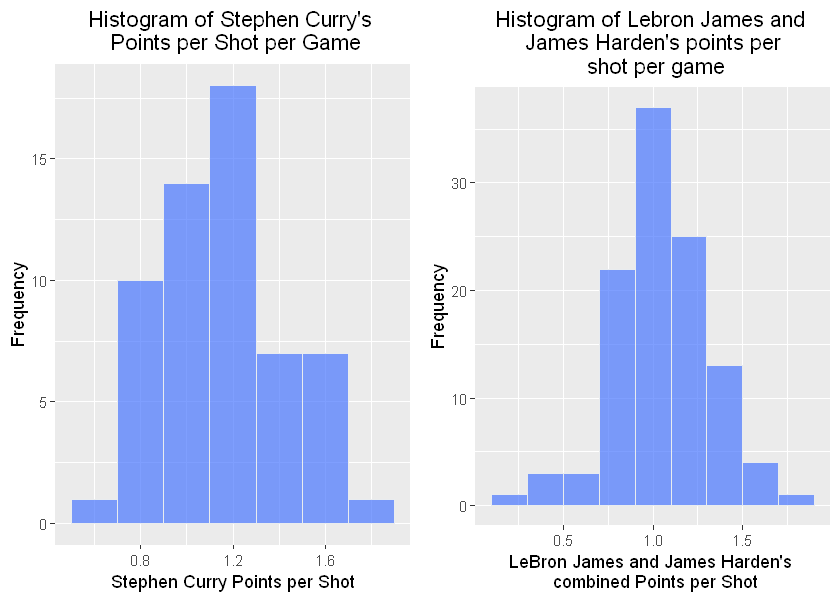

In [91]:
#install.packages('gridExtra')
p1 <- ggplot(sc_pps_df, aes(x=sc_pps)) + 
  geom_histogram(binwidth=0.2, fill="royalblue1", color="#e9ecef", alpha=0.7,position = 'identity') +
   ylab("Frequency") +
    xlab("Stephen Curry Points per Shot") +
    ggtitle("Histogram of Stephen Curry's \n Points per Shot per Game")+
    theme(plot.title = element_text(hjust = 0.5))
p2 <- ggplot(mvp_pps_df, aes(x=mvp_pps)) + 
  geom_histogram(binwidth=0.2, fill="royalblue1", color="#e9ecef", alpha=0.7,position = 'identity') +
   ylab("Frequency") +
    xlab("LeBron James and James Harden's \n combined Points per Shot") +
    ggtitle("Histogram of Lebron James and \n James Harden's points per \n shot per game")+
     theme(plot.title = element_text(hjust = 0.5))

grid.arrange(p1, p2, nrow = 1)

In [57]:
# test for normality
print('Shapiro-Wilk normality test for the Stephen Curry PPS data')
shapiro.test(sc_pps)

# test for normality
print('Shapiro-Wilk normality test for the Lebron James and James Harden PPS  data')
shapiro.test(mvp_pps)

[1] "Shapiro-Wilk normality test for the Stephen Curry PPS data"



	Shapiro-Wilk normality test

data:  sc_pps
W = 0.97022, p-value = 0.164


[1] "Shapiro-Wilk normality test for the Lebron James and James Harden PPS  data"



	Shapiro-Wilk normality test

data:  mvp_pps
W = 0.99204, p-value = 0.7809


We obtain a p-value of  0.164 for the steph pps data. At the significance level  α=0.05  for instance, we retain  H0  for  H1  and we thus conclude that you cannot reject the hypothesis that the sample comes from a population which has a normal distribution. Likewise for the james and lebron data. We obtain a p- value of 0.7809. At significance level α=0.05 we retain H0

both have large sample sizes

In [151]:
nrow(sc_pps_df)
nrow(mvp_pps_df)

[1] 58

[1] 109

In [154]:
Curry_PPS <- shapiro.test(sc_pps)$p.value
James_And_Harden_PPS <- shapiro.test(mvp_pps)$p.value
Measurement <- 'P-Value'
Results <- data.frame(Results)
shaptest <- data.frame(Measurement,Curry_PPS,James_And_Harden_PPS)
shaptest

Measurement,Curry_PPS,James_And_Harden_PPS
P-Value,0.1640065,0.7809302


In [58]:
# test equality of variances
var.test(sc_pps, mvp_pps, alternative = "two.sided")


	F test to compare two variances

data:  sc_pps and mvp_pps
F = 1.0745, num df = 57, denom df = 108, p-value = 0.7381
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.6911918 1.7258177
sample estimates:
ratio of variances 
          1.074482 


The p-value of F-test is p = 0.7381 which is greater than the significance level 0.05. In conclusion, there is no significant difference between the two variances.

In [155]:
Results <- c(var.test(sc_pps, mvp_pps, alternative = "two.sided")$estimate,
             var.test(sc_pps, mvp_pps, alternative = "two.sided")$p.value)
Measurement <- c('Estimate for the ratio of variances','P-Value')
Results <- data.frame(Results)[1:2,1]
ftest1 <- data.frame(Measurement,Results)
ftest1

Measurement,Results
Estimate for the ratio of variances,1.0744817
P-Value,0.7381446


In [92]:
t.test(sc_pps, mvp_pps, alternative='less', conf.level=0.95,var.equal = TRUE)


	Two Sample t-test

data:  sc_pps and mvp_pps
t = 2.4345, df = 165, p-value = 0.992
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
      -Inf 0.1886002
sample estimates:
mean of x mean of y 
 1.164923  1.052625 


In [156]:
Results <- c(t.test(sc_pps, mvp_pps, alternative='less', conf.level=0.95,var.equal = TRUE)$estimate,
             t.test(sc_pps, mvp_pps, alternative='less', conf.level=0.95,var.equal = TRUE)$p.value)
Measurement <- c('Estimated mean of x','Estimated mean of y','P-Value')
Results <- data.frame(Results)[1:3,1]
ttest1 <- data.frame(Measurement,Results)
ttest1

Measurement,Results
Estimated mean of x,1.1649235
Estimated mean of y,1.0526254
P-Value,0.9920107


## T test 

##### does steph curry shoot the same percentage per game in the clutch as the regular time?

is steph curry's shot affected by pressure?

We will test if the shooting percentage remains the same during clutch times (last 5 mins final margin < 11 or last second of shot clock) and regular time

clutch_df is the clutch time shot data

regular_df is the regular time shot data

$H_{0} : \mu_{clutch} = \mu_{regular}$

$H_{1} : \mu_{clutch} > \mu_{regular}$

In [60]:
#get the data for clutch

#subset the steph dataframe by last 5 minutes 4,5,6 or 7th period final margin less than 11 OR shot clock less than 1
clutch_df <- steph_df[(steph_df$GAME_CLOCK < 500 & steph_df$PERIOD > 3 & abs(steph_df$FINAL_MARGIN) < 11) | steph_df$SHOT_CLOCK > 23,
                      c('GAME_ID','FGM')]

#find amount of shots made and missed for each game
clutch_made <- clutch_df[clutch_df$FGM == 1, 'GAME_ID']
clutch_made <- as.data.frame(table(clutch_made))

clutch_missed <- clutch_df[clutch_df$FGM == 0, 'GAME_ID']
clutch_missed <- as.data.frame(table(clutch_missed))


clutch_total <- merge(clutch_made,clutch_missed,by.x='clutch_made',by.y='clutch_missed', all=TRUE,
                        suffixes = c(" made"," missed"))

#replace missing values with 0
clutch_total [is.na(clutch_total )] <- 0

clutch_percent <- clutch_total[,2] / (clutch_total[,2] + clutch_total[,3])

In [61]:
nrow(clutch_missed)

[1] 22

In [62]:
#data for regular time

regular_df <- steph_df[!((steph_df$GAME_CLOCK < 500 & steph_df$PERIOD > 3 & abs(steph_df$FINAL_MARGIN) < 8) | steph_df$SHOT_CLOCK > 23),
                      c('GAME_ID','FGM')]

#find amount of shots made and missed for each game
regular_made <- regular_df[regular_df$FGM == 1, 'GAME_ID']
regular_made <- as.data.frame(table(regular_made))

regular_missed <- regular_df[regular_df$FGM == 0, 'GAME_ID']
regular_missed <- as.data.frame(table(regular_missed))

regular_total <- merge(regular_made,regular_missed,by.x='regular_made',by.y='regular_missed', all=TRUE,
                       suffixes = c(" made"," missed"))

#replace missing values with 0
regular_total [is.na(regular_total )] <- 0

regular_percent <- regular_total[,2] / (regular_total[,2] + regular_total[,3])


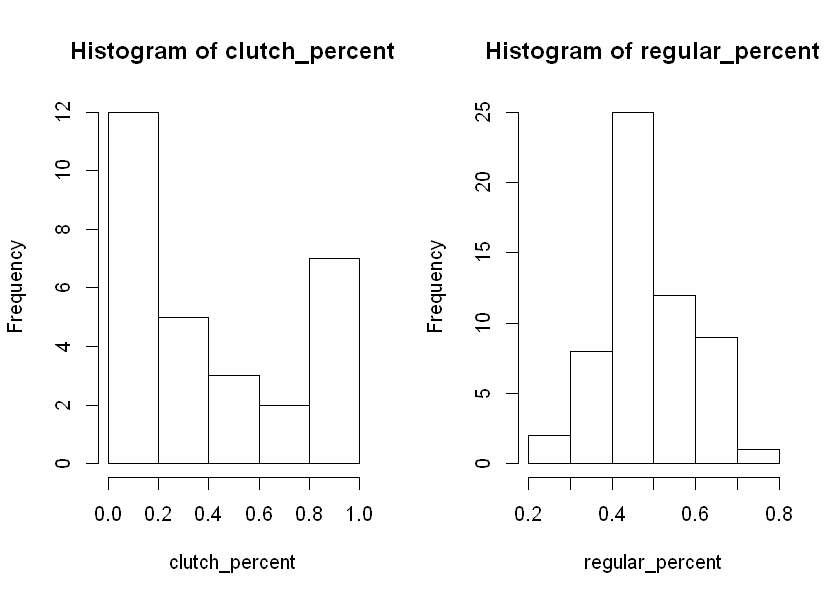

In [63]:
par(mfrow=c(1,2))
hist(clutch_percent)
hist(regular_percent)

In [64]:
# test for normality
library(ggpubr)
print('Shapiro-Wilk normality test for the clutch data')
shapiro.test(clutch_percent)
print('Shapiro-Wilk normality test for the regular data')
shapiro.test(regular_percent)

Warning message:
"package 'ggpubr' was built under R version 3.6.3"

[1] "Shapiro-Wilk normality test for the clutch data"



	Shapiro-Wilk normality test

data:  clutch_percent
W = 0.82799, p-value = 0.000277


[1] "Shapiro-Wilk normality test for the regular data"



	Shapiro-Wilk normality test

data:  regular_percent
W = 0.98725, p-value = 0.8096


The clutch data is not normally distributed but the sample size of $71$ means that means of samples from a population with finite variance approach a normal distribution regardless of the distribution of the population (central limit theorem)

By the central limit theorem, means of samples from a population with finite variance approach a normal distribution regardless of the distribution of the population. Rules of thumb say that the sample means are basically normally distributed as long as the sample size is at least 20 or 30. For a t-test to be valid on a sample of smaller size, the population distribution would have to be approximately normal. https://stats.stackexchange.com/questions/9573/t-test-for-non-normal-when-n50#:~:text=For%20a%20t%2Dtest%20to,samples%20from%20non%2Dnormal%20distributions.

In [65]:
t.test(clutch_percent, regular_percent, alternative='two.sided', conf.level=0.95)


	Welch Two Sample t-test

data:  clutch_percent and regular_percent
t = -1.0847, df = 30.04, p-value = 0.2867
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2354382  0.0720885
sample estimates:
mean of x mean of y 
0.4093596 0.4910345 


We obtain a p-value of 0.8172. At a significance level  𝛼=0.05 , we therefore retain $𝐻_{0}$. This means that steph may shoot the same percentage in the clutch moments as regular moments. 

Compare to rest of the league

### 2 Sample t-test clutchness steph vs the nba

$H_{0} : \mu_{steph- clutch} = \mu_{nba- clutch}$

$H_{1} : \mu_{steph- clutch} > \mu_{nba- clutch}$

In [66]:
#rename for steph data
clutch_sc <- clutch_df
clutch_percent_sc <- clutch_percent


# obtain clutch data for the rest of the league 
clutch_nba <- nba_data[(nba_data$GAME_CLOCK < 500 & nba_data$PERIOD > 3 & abs(nba_data$FINAL_MARGIN) < 8) | 
                       nba_data$SHOT_CLOCK > 23, c('GAME_ID','FGM')]

#find percent, copy paste as above
clutch_made_nba <- clutch_nba[clutch_nba$FGM == 1, 'GAME_ID']
clutch_made_nba <- as.data.frame(table(clutch_made_nba))

clutch_missed_nba <- clutch_nba[clutch_nba$FGM == 0, 'GAME_ID']
clutch_missed_nba <- as.data.frame(table(clutch_missed_nba))

clutch_total_nba <- merge(clutch_made_nba,clutch_missed_nba,by.x='clutch_made_nba',by.y='clutch_missed_nba', all=TRUE,
                        suffixes = c(" made"," missed"))

#replace missing values with 0
clutch_total_nba[is.na(clutch_total_nba)] <- 0

clutch_percent_nba <- clutch_total_nba[,2] / (clutch_total_nba[,2] + clutch_total_nba[,3])

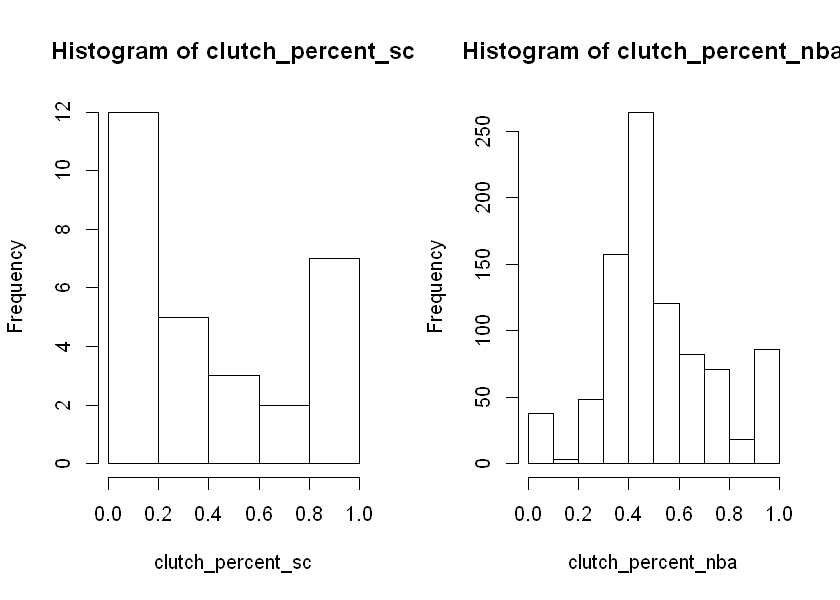

In [67]:
par(mfrow=c(1,2))
hist(clutch_percent_sc)
hist(clutch_percent_nba)

In [68]:
t.test(clutch_percent_sc, clutch_percent_nba, alternative='greater', conf.level=0.95)


	Welch Two Sample t-test

data:  clutch_percent_sc and clutch_percent_nba
t = -1.6324, df = 28.609, p-value = 0.9432
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -0.247818       Inf
sample estimates:
mean of x mean of y 
0.4093596 0.5307574 


We obtain a p-value of 0.9151. At a significance level  𝛼=0.05 , we therefore retain $𝐻_{0}$. This means that steph may shoot the same percentage in the clutch moments vs the rest of the nba. 

Let's compare this to the top 3 point shooters

### 2 Sample t-test clutchness steph vs top 3 point shooters

In [69]:
# obtain clutch data for the top 3 point shooters

#subset nba_data for those shooters
three_data <- nba_data[(nba_data$PLAYER_NAME=='Damian Lillard'|nba_data$PLAYER_NAME=='James Harden'|
                      nba_data$PLAYER_NAME=='Klay Thompson'|nba_data$PLAYER_NAME=='Kyle Korver'|
                      nba_data$PLAYER_NAME=='Trevor Ariza'|nba_data$PLAYER_NAME=='Wesley Matthews'),]

#subset for the clutch shots
clutch_three <- three_data[(three_data$GAME_CLOCK < 500 & three_data$PERIOD > 3 & abs(three_data$FINAL_MARGIN) < 8) | 
                       three_data$SHOT_CLOCK > 23, c('GAME_ID','FGM')]

#find percent, copy paste as above
clutch_made_three <- clutch_three[clutch_three$FGM == 1, 'GAME_ID']
clutch_made_three <- as.data.frame(table(clutch_made_three))

clutch_missed_three <- clutch_three[clutch_three$FGM == 0, 'GAME_ID']
clutch_missed_three <- as.data.frame(table(clutch_missed_three))

clutch_total_three <- merge(clutch_made_three,clutch_missed_three,by.x='clutch_made_three',by.y='clutch_missed_three', all=TRUE,
                        suffixes = c(" made"," missed"))

#replace missing values with 0
clutch_total_three[is.na(clutch_total_three)] <- 0

clutch_percent_three <- clutch_total_three[,2] / (clutch_total_three[,2] + clutch_total_three[,3])

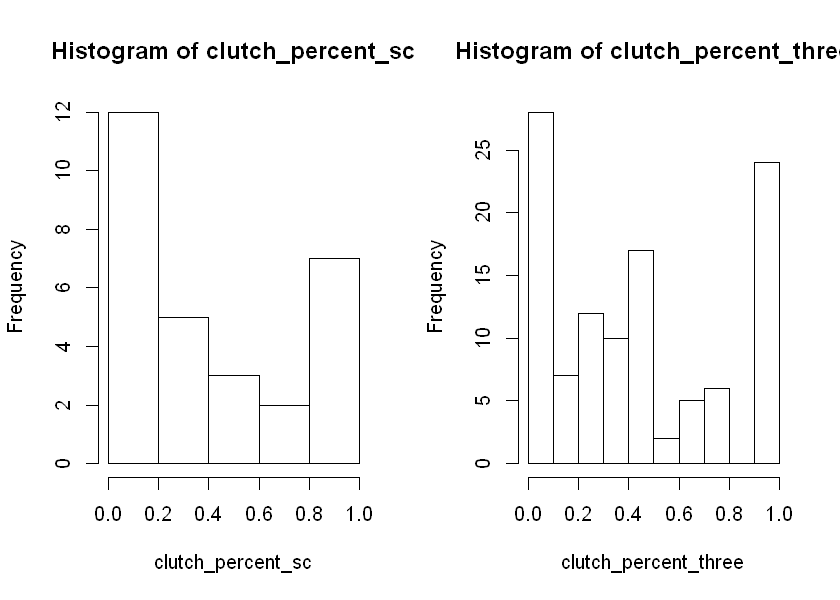

In [70]:
par(mfrow=c(1,2))
hist(clutch_percent_sc)
hist(clutch_percent_three)

In [71]:
t.test(clutch_percent_sc, clutch_percent_three, alternative='greater', conf.level=0.95)


	Welch Two Sample t-test

data:  clutch_percent_sc and clutch_percent_three
t = -0.40644, df = 41.266, p-value = 0.6567
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -0.1707916        Inf
sample estimates:
mean of x mean of y 
0.4093596 0.4425880 


We obtain a p-value of 0.6221. At a significance level  𝛼=0.05 , we therefore retain $𝐻_{0}$. This means that steph may shoot the same percentage in the clutch moments vs the other top 3 point shooters.

#### t test steph 3 point shot makes vs rest of nba 

$H_{0} : \mu_{clutch} = \mu_{regular}$

$H_{1} : \mu_{clutch} > \mu_{regular}$

In [72]:
#3 pointer made by steph per game
three_made_sc <- steph_df[steph_df$PTS == 3,'GAME_ID']
three_made_sc <- as.data.frame(table(three_made_sc))

#3 pointer made by nba players per game 
three_made_nba <- nba_data[nba_data$PTS == 3,c('GAME_ID','PLAYER_NAME')]
three_made_nba <- as.data.frame(table(three_made_nba))

# delete rows with 0
three_made_nba <- three_made_nba[three_made_nba$Freq > 0,]

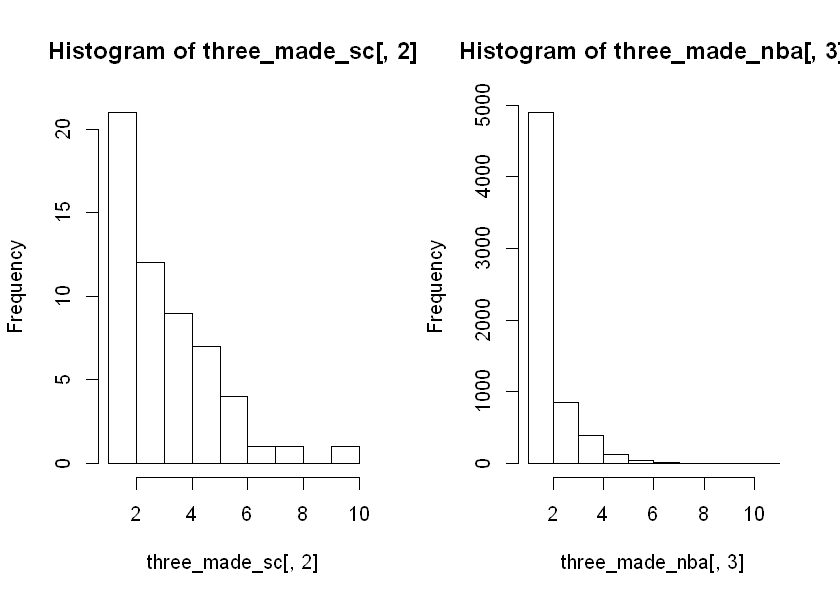

In [73]:
par(mfrow=c(1,2))
hist(three_made_sc[,2])
hist(three_made_nba[,3])

In [74]:
# test for normality
print('Shapiro-Wilk normality test for the steph data')
shapiro.test(three_made_sc[,2])

# sample size is too large (make it a random sample)
print('Shapiro-Wilk normality test for the nba data')
shapiro.test(three_made_nba[1:5000,3])

[1] "Shapiro-Wilk normality test for the steph data"



	Shapiro-Wilk normality test

data:  three_made_sc[, 2]
W = 0.90904, p-value = 0.0004616


[1] "Shapiro-Wilk normality test for the nba data"



	Shapiro-Wilk normality test

data:  three_made_nba[1:5000, 3]
W = 0.76109, p-value < 2.2e-16


Both p values are very small, suggests the data is not guassian. 

However due to the central limit theorem and both samples being quite large, they approach a normal distribution regardless of the distribution of the population

In [75]:
t.test(three_made_sc[,2], three_made_nba[,3], alternative='greater', conf.level=0.95)


	Welch Two Sample t-test

data:  three_made_sc[, 2] and three_made_nba[, 3]
t = 5.7286, df = 55.331, p-value = 2.162e-07
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 1.052634      Inf
sample estimates:
mean of x mean of y 
 3.357143  1.870327 


We obtain a small p-value of 2.162e-07. At a significance level  𝛼=0.05 , we therefore reject $𝐻_{0}$.

This suggests Steph makes more 3's per game than the rest of the nba

## t test (non parametric)

#### steph curry clutchness 

is steph curry's shot affected by pressure?

We will test if the shooting percentage remains the same during clutch times (last 5 mins final margin < 11 or last second of shot clock) and regular time

Then do the one way t test

$H_{0} : \mu_{clutch} = \mu_{regular}$

$H_{1} : \mu_{clutch} != \mu_{regular}$

https://statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide-2.php

In [182]:
#get the data for clutch

#subset the steph dataframe by last 5 minutes 4,5,6 or 7th period final margin less than 11 OR shot clock less than 1
clutch_df <- steph_df[(steph_df$GAME_CLOCK < 500 & steph_df$PERIOD > 3 & abs(steph_df$FINAL_MARGIN) < 11) | steph_df$SHOT_CLOCK > 23,
                      c('GAME_ID','FGM')]

#find amount of shots made and missed for each game
clutch_made <- clutch_df[clutch_df$FGM == 1, 'GAME_ID']
clutch_made <- as.data.frame(table(clutch_made))

clutch_missed <- clutch_df[clutch_df$FGM == 0, 'GAME_ID']
clutch_missed <- as.data.frame(table(clutch_missed))


clutch_total <- merge(clutch_made,clutch_missed,by.x='clutch_made',by.y='clutch_missed', all=TRUE,
                        suffixes = c(" made"," missed"))

#replace missing values with 0
clutch_total [is.na(clutch_total )] <- 0

clutch_percent <- clutch_total[,2] / (clutch_total[,2] + clutch_total[,3])
clutch_df <- data.frame(clutch_percent)

In [183]:
#data for regular time

regular_df <- steph_df[!((steph_df$GAME_CLOCK < 500 & steph_df$PERIOD > 3 & abs(steph_df$FINAL_MARGIN) < 8) | steph_df$SHOT_CLOCK > 23),
                      c('GAME_ID','FGM')]

#find amount of shots made and missed for each game
regular_made <- regular_df[regular_df$FGM == 1, 'GAME_ID']
regular_made <- as.data.frame(table(regular_made))

regular_missed <- regular_df[regular_df$FGM == 0, 'GAME_ID']
regular_missed <- as.data.frame(table(regular_missed))

regular_total <- merge(regular_made,regular_missed,by.x='regular_made',by.y='regular_missed', all=TRUE,
                       suffixes = c(" made"," missed"))

#replace missing values with 0
regular_total [is.na(regular_total )] <- 0

regular_percent <- regular_total[,2] / (regular_total[,2] + regular_total[,3])
regular_df <- data.frame(regular_percent)

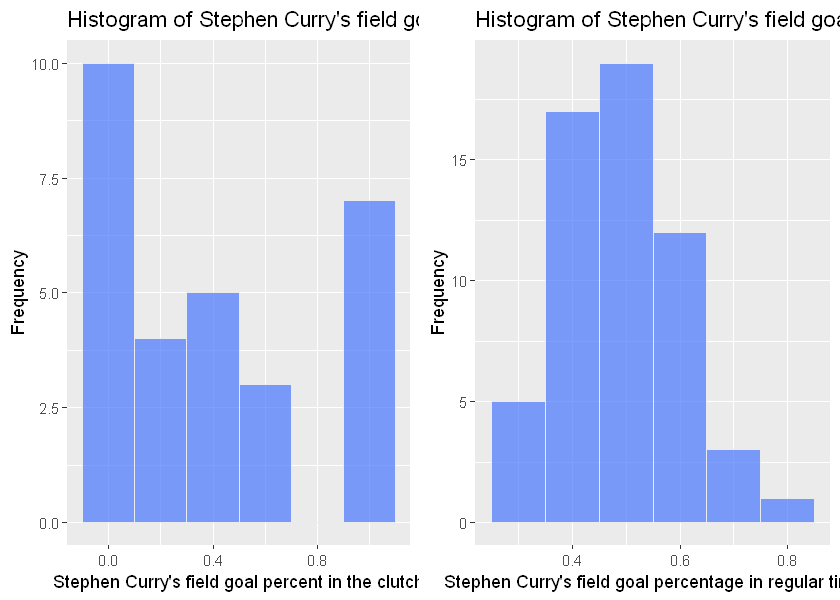

In [184]:
p1 <- ggplot(clutch_df, aes(x=clutch_df[,1])) + 
  geom_histogram(binwidth=0.2, fill="royalblue1", color="#e9ecef", alpha=0.7,position = 'identity') +
   ylab("Frequency") +
    xlab("Stephen Curry's field goal percent in the clutch") +
    ggtitle("Histogram of Stephen Curry's field goal percentage in the clutch")
p2 <- ggplot(regular_df, aes(x=regular_df[,1])) + 
  geom_histogram(binwidth=0.1, fill="royalblue1", color="#e9ecef", alpha=0.7,position = 'identity') +
   ylab("Frequency") +
    xlab("Stephen Curry's field goal percentage in regular time") +
    ggtitle("Histogram of Stephen Curry's field goal percentage in regular time")

grid.arrange(p1, p2, nrow = 1)

In [185]:
# test for normality
print('Shapiro-Wilk normality test for the clutch data')
shapiro.test(clutch_percent)
print('Shapiro-Wilk normality test for the regular data')
shapiro.test(regular_percent)

[1] "Shapiro-Wilk normality test for the clutch data"



	Shapiro-Wilk normality test

data:  clutch_percent
W = 0.82799, p-value = 0.000277


[1] "Shapiro-Wilk normality test for the regular data"



	Shapiro-Wilk normality test

data:  regular_percent
W = 0.98725, p-value = 0.8096


We obtain a p value of 0.8096 for the regular timed data. At significance of alpha =0.05, the Shapiro-wilk test suggests that the data is approximately normally distributed. 
We obtain a p value of 0.00277 for the clutch data which, at significance level of alpha =0.05, we reject H0 that the data is approximately normally distibuted. However since there is a large sample size ({number}) due to the central lmit theorem, the data is approxiamtely noramlly distributed 

In [186]:
Clutch <- shapiro.test(clutch_percent)$p.value
Regular <- shapiro.test(regular_percent)$p.value
Measurement <- 'P-Value'
Results <- data.frame(Results)
shaptest2 <- data.frame(Measurement,Clutch,Regular)
shaptest2

Measurement,Clutch,Regular
P-Value,0.0002770426,0.8096102


In [80]:
# test equality of variances
var.test(clutch_percent, regular_percent, alternative = "two.sided")


	F test to compare two variances

data:  clutch_percent and regular_percent
F = 14.085, num df = 28, denom df = 56, p-value = 4.441e-16
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
  7.603194 28.024690
sample estimates:
ratio of variances 
          14.08547 


We obtain a very small p value of 4.441e-16 which, at the significance level of alpha = 0.05, we reject H0. In conclusion, there is sugested significant difference between the two variances.

Since the assumptions of the t test have not been met we will conduct a non-parametric test instead. We will conduct the wilcox rank sum test

In [81]:
wilcox.test(clutch_percent,regular_percent,alternative='two.sided', conf.level=0.95)


	Wilcoxon rank sum test with continuity correction

data:  clutch_percent and regular_percent
W = 629, p-value = 0.07146
alternative hypothesis: true location shift is not equal to 0


We obtain a p value of p = 0.07146 which, at alpha =0.05, is greater than the significance level so we therefore retain H0. Thus we cannot conclude that a significant difference exists between Stephen Curry's shooting percentage in clutch moments and regular time moments

Conclusion:
We did obtain a p value at 0.07146 which at alpha = 0.01, for instance, we would reject H0 in favour of the alternate hypothesis. Maybe if we increased the sample size to include the clutch data in the playoff we would recieve a more significant conclusion.

In [159]:
Results <- wilcox.test(clutch_percent,regular_percent,alternative='two.sided', conf.level=0.95)$p.value
Measurement <- 'P-Value'
Results <- data.frame(Results)
ttest2 <- data.frame(Measurement,Results)
ttest2

Measurement,Results
P-Value,0.07146299


In [187]:
Results <- kruskal.test(clutch_percent,regular_percent,alternative='two.sided', conf.level=0.95)$p.value
Measurement <- 'P-Value'
Results <- data.frame(Results)
ttest2 <- data.frame(Measurement,Results)

ERROR: Error in kruskal.test.default(clutch_percent, regular_percent, alternative = "two.sided", : 'x' and 'g' must have the same length


## Correlation

In [82]:
rcorr(as.matrix(steph_df[,c('FGM','FINAL_MARGIN','SHOT_NUMBER','PERIOD','SHOT_CLOCK','GAME_CLOCK','DRIBBLES','TOUCH_TIME',
                               'SHOT_DIST','PTS_TYPE','CLOSE_DEF_DIST')]))
print(' ')
rcorr(as.matrix(nba_data[,c('FGM','FINAL_MARGIN','SHOT_NUMBER','PERIOD','SHOT_CLOCK','GAME_CLOCK','DRIBBLES','TOUCH_TIME',
                               'SHOT_DIST','PTS_TYPE','CLOSE_DEF_DIST')]))

Warning message:
"package 'Hmisc' was built under R version 3.6.3"Loading required package: lattice
Loading required package: survival
Warning message:
"package 'survival' was built under R version 3.6.3"Loading required package: Formula
Warning message:
"package 'Formula' was built under R version 3.6.3"
Attaching package: 'Hmisc'

The following objects are masked from 'package:dplyr':

    src, summarize

The following objects are masked from 'package:base':

    format.pval, units



                 FGM FINAL_MARGIN SHOT_NUMBER PERIOD SHOT_CLOCK GAME_CLOCK
FGM             1.00         0.04       -0.04  -0.04       0.04       0.04
FINAL_MARGIN    0.04         1.00       -0.10  -0.13      -0.06      -0.06
SHOT_NUMBER    -0.04        -0.10        1.00   0.86      -0.19      -0.20
PERIOD         -0.04        -0.13        0.86   1.00      -0.17      -0.05
SHOT_CLOCK      0.04        -0.06       -0.19  -0.17       1.00       0.15
GAME_CLOCK      0.04        -0.06       -0.20  -0.05       0.15       1.00
DRIBBLES       -0.02        -0.01        0.15   0.12      -0.04      -0.16
TOUCH_TIME     -0.03        -0.01        0.16   0.13      -0.07      -0.17
SHOT_DIST      -0.21        -0.01       -0.01  -0.03      -0.04      -0.01
PTS_TYPE       -0.14         0.02       -0.01  -0.01      -0.01      -0.02
CLOSE_DEF_DIST  0.03         0.04       -0.02  -0.05       0.10       0.04
               DRIBBLES TOUCH_TIME SHOT_DIST PTS_TYPE CLOSE_DEF_DIST
FGM               -0.02      -0

[1] " "


                 FGM FINAL_MARGIN SHOT_NUMBER PERIOD SHOT_CLOCK GAME_CLOCK
FGM             1.00         0.06       -0.01  -0.01       0.10       0.02
FINAL_MARGIN    0.06         1.00        0.00   0.00      -0.01       0.00
SHOT_NUMBER    -0.01         0.00        1.00   0.66      -0.03      -0.09
PERIOD         -0.01         0.00        0.66   1.00      -0.05      -0.02
SHOT_CLOCK      0.10        -0.01       -0.03  -0.05       1.00       0.05
GAME_CLOCK      0.02         0.00       -0.09  -0.02       0.05       1.00
DRIBBLES       -0.03         0.01        0.14   0.06      -0.07      -0.09
TOUCH_TIME     -0.05         0.01        0.15   0.05      -0.13      -0.08
SHOT_DIST      -0.19         0.01        0.01   0.03      -0.15      -0.04
PTS_TYPE       -0.12         0.02        0.00   0.05      -0.02      -0.04
CLOSE_DEF_DIST  0.00         0.03       -0.04  -0.01       0.04       0.00
               DRIBBLES TOUCH_TIME SHOT_DIST PTS_TYPE CLOSE_DEF_DIST
FGM               -0.03      -0

In [83]:
nonononononnono

ERROR: Error in eval(expr, envir, enclos): object 'nonononononnono' not found


## Regression

predict if a shot will go in 

We search for the set of features that may lead to the best model to predict `FGM`. 

In [ ]:
#install.packages('corrplot')

In [ ]:
library('corrplot')

CorrMat <- cor(nba_data[,c('FGM','FINAL_MARGIN','SHOT_NUMBER','PERIOD','SHOT_CLOCK','GAME_CLOCK','DRIBBLES','TOUCH_TIME',
                               'SHOT_DIST','PTS_TYPE','CLOSE_DEF_DIST' )])
corrplot(CorrMat, method="circle")

In [ ]:
mod0 <- lm(FGM ~ 1, data=nba_data)

#not sure if I can use final margin
step(mod0, scope=list(lower=FGM~1,
                      upper=FGM~FINAL_MARGIN+SHOT_NUMBER+PERIOD+SHOT_CLOCK+GAME_CLOCK+DRIBBLES+TOUCH_TIME+
                      SHOT_DIST+PTS_TYPE+CLOSE_DEF_DIST),trace=1)

For model comparison, the model with the lowest AIC score is preferred. The absolute values of the AIC scores do not matter. These scores can be negative or positive. You should not care for the absolute values and the sign of AIC scores when comparing models.

https://books.google.ca/books?id=fT1Iu-h6E-oC&printsec=frontcover#v=onepage&q&f=false

The highest absolute AIC score is 181735. The model is: FGM ~ SHOT_DIST + CLOSE_DEF_DIST + FINAL_MARGIN + TOUCH_TIME + 
    SHOT_CLOCK + DRIBBLES + PTS_TYPE + SHOT_NUMBER.

In [ ]:
model = lm(FGM ~  SHOT_DIST + CLOSE_DEF_DIST + FINAL_MARGIN + TOUCH_TIME + SHOT_CLOCK + DRIBBLES + 
           PTS_TYPE + SHOT_NUMBER, data=nba_data)
summary(model)

##### Can we predict Stephen Curry's shot outcome using regression?

In [ ]:
library('corrplot')

CorrMat_sc <- cor(steph_df[,c('FGM','FINAL_MARGIN','SHOT_NUMBER','PERIOD','SHOT_CLOCK','GAME_CLOCK','DRIBBLES','TOUCH_TIME',
                               'SHOT_DIST','PTS_TYPE','CLOSE_DEF_DIST' )])
corrplot(CorrMat_sc, method="circle")

In [ ]:
mod0_sc <- lm(FGM ~ 1, data=steph_df)

#not sure if I can use final margin
step(mod0_sc, scope=list(lower=FGM~1,
                      upper=FGM~FINAL_MARGIN+SHOT_NUMBER+PERIOD+SHOT_CLOCK+GAME_CLOCK+DRIBBLES+TOUCH_TIME+
                      SHOT_DIST+PTS_TYPE+CLOSE_DEF_DIST),trace=1)

The highest absolute AIC score is 1376.31. The model is:FGM ~ SHOT_DIST + CLOSE_DEF_DIST + PTS_TYPE + PERIOD

In [ ]:
model_sc = glm(FGM ~  SHOT_DIST + CLOSE_DEF_DIST + PTS_TYPE + PERIOD, data=steph_df, family='binomial')
summary(model_sc)

In [ ]:
prediction <- ifelse(predict(model_sc, steph_df, type='response') > 0.41, TRUE, FALSE)
confusion  <- table(prediction, as.logical(model_sc$y))

In [ ]:
confusion.glm <- function(data, model, tresh){
  prediction <- ifelse(predict(model, data, type='response') > tresh, TRUE, FALSE)
  confusion  <- table(prediction, as.logical(model$y))
  confusion  <- cbind(confusion, c(1 - confusion[1,1]/(confusion[1,1]+confusion[2,1]), 
                                   1 - confusion[2,2]/(confusion[2,2]+confusion[1,2])))
  confusion  <- as.data.frame(confusion)
  names(confusion) <- c('FALSE', 'TRUE', 'class.error')
  confusion
}

In [ ]:
#install.packages('pROC')

In [ ]:
library('pROC')

prob <- predict(model_sc, type=c("response"))

steph_df$prob <- prob

ROC_curve <- roc(FGM ~ prob, data=steph_df, 
                 levels=c(0,1), direction='<')

options(repr.plot.width=6, repr.plot.height=6)

plot(ROC_curve)

# Confusion matrix at a given decision treshod
# 0.41 because 
Confu_T <- confusion.glm(steph_df, model_sc, 0.41)

SensitivityT <- Confu_T[2,2]/sum(Confu_T[,2])
SpecificityT <- Confu_T[1,1]/sum(Confu_T[,1])

abline(v=SpecificityT, col='orange', lwd=4, lty=3)
abline(h=SensitivityT , col='orange', lwd=4, lty=3)

In [ ]:
# install.packages('cowplot')
#https://github.com/StatQuest/logistic_regression_demo/blob/master/logistic_regression_demo.R

In [ ]:
library(ggplot2)
library(cowplot)

predicted.data <- data.frame(steph_df$prob,steph_df$FGM)
predicted.data <- predicted.data[
  order(steph_df$prob, decreasing=FALSE),]
predicted.data$rank <- 1:nrow(predicted.data)

## Lastly, we can plot the predicted probabilities for each sample having

options(repr.plot.width=6, repr.plot.height=6)

ggplot(data=predicted.data, aes(x=rank, y=steph_df.prob)) +
  geom_point(aes(color=steph_df.FGM), alpha=1, shape=4, stroke=2) +
  xlab("Index") +
  ylab("Predicted probability of making a field goal")
 

### Improving the model

I will split the data into training and test sets to see if this will improve model performance

and scale features, add away team and location

##### away team and location

In [ ]:
#install.packages('dummies')

In [ ]:
#load package
library(dummies)

#maybe add 'AWAY_TEAM'
steph_df <- dummy.data.frame(steph_df, names=c('LOCATION'), sep="_")

In [ ]:
#install.packages('caTools')
#https://www.analytics-tuts.com/how-to-split-train-and-test-data-in-r/

##### train and test split

In [ ]:
# take the data 
sc_model_data <- steph_df[,c('FGM','FINAL_MARGIN','SHOT_NUMBER','PERIOD','SHOT_CLOCK','GAME_CLOCK','DRIBBLES','TOUCH_TIME',
                               'SHOT_DIST','PTS_TYPE','CLOSE_DEF_DIST','LOCATION_A','LOCATION_H' )]
#load package
library(caTools)

#split the data
data <- sample.split(sc_model_data,SplitRatio = 0.8)

#train data
train <- subset(sc_model_data,data==TRUE)

#subsetting into Test data
test =subset(sc_model_data,data==FALSE)

feature scaling

In [ ]:
train[,c('FINAL_MARGIN','SHOT_NUMBER','SHOT_CLOCK','GAME_CLOCK','DRIBBLES','TOUCH_TIME',
                               'SHOT_DIST','CLOSE_DEF_DIST')]<- scale(train[,c('FINAL_MARGIN','SHOT_NUMBER','SHOT_CLOCK','GAME_CLOCK','DRIBBLES','TOUCH_TIME',
                               'SHOT_DIST','CLOSE_DEF_DIST')])
test[,c('FINAL_MARGIN','SHOT_NUMBER','SHOT_CLOCK','GAME_CLOCK','DRIBBLES','TOUCH_TIME',
                               'SHOT_DIST','CLOSE_DEF_DIST')]<- scale(test[,c('FINAL_MARGIN','SHOT_NUMBER','SHOT_CLOCK','GAME_CLOCK','DRIBBLES','TOUCH_TIME',
                             'SHOT_DIST','CLOSE_DEF_DIST')])


I will change categorial variaibles to categorical variables (fgm,ptstype,period(?)

is period categorical(?)

In [ ]:
test$FGM <- as.factor(test$FGM)
train$FGM <- as.factor(train$FGM)

test$PTS_TYPE <- as.factor(test$PTS_TYPE)
train$PTS_TYPE<- as.factor(train$PTS_TYPE)

test$PERIOD <- as.factor(test$PERIOD)
train$PERIOD<- as.factor(train$PERIOD)

test$LOCATION_A <- as.factor(test$LOCATION_A)
train$LOCATION_A <- as.factor(train$LOCATION_A)

test$LOCATION_H <- as.factor(test$LOCATION_H)
train$LOCATION_H <- as.factor(train$LOCATION_H)

Find the best parameters

In [ ]:
model_sc <- glm(FGM~1, data=train,family='binomial')


step(model_sc, scope=list(lower=FGM~1,
                      upper=FGM~FINAL_MARGIN+SHOT_NUMBER+PERIOD+SHOT_CLOCK+GAME_CLOCK+DRIBBLES+TOUCH_TIME+
                      SHOT_DIST+PTS_TYPE+CLOSE_DEF_DIST+LOCATION_H+LOCATION_A),trace=1)

Now I will fit a logistic regression model using the training data 

##### Model results for Stephen Curry 

In [ ]:

new_model <- glm(FGM~ SHOT_DIST + CLOSE_DEF_DIST + PTS_TYPE + TOUCH_TIME,data= train, family='binomial')
summary(new_model)

Use the model to make predictions for the test data 

In [ ]:
model_pred_prob = predict(new_model, test, type='response')

#new df with prediction 
model_pred_FGM <- rep(1,nrow(test))
model_pred_FGM[model_pred_prob > 0.5] <- 0

#confusion matrix
confu_mat <- table(model_pred_FGM,test[,1])
confu_mat
#mean(model_pred_FGM != test[,1])
#accuracy
(confu_mat[1,1]+confu_mat[2,2])/ (confu_mat[1,1]+confu_mat[2,2]+ confu_mat[2,1]+confu_mat[1,2])

accuracy has decreased

In [ ]:
test$prob <- model_pred_prob

# plot a ROC as above
ROC_curve <- roc(FGM ~ prob, data=test, 
                 levels=c(0,1), direction='<')

options(repr.plot.width=6, repr.plot.height=6)
(confu_mat[1,1]+confu_mat[2,2])/ (confu_mat[1,1]+confu_mat[2,2]+ confu_mat[2,1]+confu_mat[1,2])
plot(ROC_curve)

In [ ]:
predicted.data <- data.frame(test$prob,test$FGM)
predicted.data <- predicted.data[
  order(test$prob, decreasing=FALSE),]
predicted.data$rank <- 1:nrow(predicted.data)

## Lastly, we can plot the predicted probabilities for each sample having

options(repr.plot.width=5, repr.plot.height=5)

ggplot(data=predicted.data, aes(x=rank, y=test.prob)) +
  geom_point(aes(color=test.FGM), alpha=1, shape=4, stroke=2) +
  xlab("Index") +
  ylab("Predicted probability of making a field goal")
 

In [ ]:
#install.packages('MLmetrics')
library(MLmetrics)

F1_Score(y_pred=model_pred_FGM, y_true = test$FGM)

### Logistic regression for top 3 point shooters

In [ ]:
#get data
three_df <- nba_data[(nba_data$PLAYER_NAME=='Damian Lillard'|nba_data$PLAYER_NAME=='James Harden'|
                      nba_data$PLAYER_NAME=='Klay Thompson'|nba_data$PLAYER_NAME=='Kyle Korver'|
                      nba_data$PLAYER_NAME=='Trevor Ariza'|nba_data$PLAYER_NAME=='Wesley Matthews'),]

In [ ]:
#load package
library(dummies)

three_df <- dummy.data.frame(three_df, names=c('LOCATION'), sep="_")

In [ ]:
#train and test split

# take the data 
three_model_data <- three_df[,c('FGM','FINAL_MARGIN','SHOT_NUMBER','PERIOD','SHOT_CLOCK','GAME_CLOCK','DRIBBLES','TOUCH_TIME',
                               'SHOT_DIST','PTS_TYPE','CLOSE_DEF_DIST','LOCATION_A','LOCATION_H')]
#load package
library(caTools)

#split the data
data <- sample.split(three_model_data,SplitRatio = 0.8)

#train data
train <- subset(three_model_data,data==TRUE)

#subsetting into Test data
test <- subset(sc_model_data,data==FALSE)

In [ ]:
#feature scaling

train[,c('FINAL_MARGIN','SHOT_NUMBER','SHOT_CLOCK','GAME_CLOCK','DRIBBLES','TOUCH_TIME',
                               'SHOT_DIST','CLOSE_DEF_DIST')]<- scale(train[,c('FINAL_MARGIN','SHOT_NUMBER','SHOT_CLOCK','GAME_CLOCK','DRIBBLES','TOUCH_TIME',
                               'SHOT_DIST','CLOSE_DEF_DIST')])
test[,c('FINAL_MARGIN','SHOT_NUMBER','SHOT_CLOCK','GAME_CLOCK','DRIBBLES','TOUCH_TIME',
                               'SHOT_DIST','CLOSE_DEF_DIST')]<- scale(test[,c('FINAL_MARGIN','SHOT_NUMBER','SHOT_CLOCK','GAME_CLOCK','DRIBBLES','TOUCH_TIME',
                             'SHOT_DIST','CLOSE_DEF_DIST')])

In [ ]:
test$FGM <- as.factor(test$FGM)
train$FGM <- as.factor(train$FGM)

test$PTS_TYPE <- as.factor(test$PTS_TYPE)
train$PTS_TYPE<- as.factor(train$PTS_TYPE)

test$PERIOD <- as.factor(test$PERIOD)
train$PERIOD<- as.factor(train$PERIOD)

test$LOCATION_A <- as.factor(test$LOCATION_A)
train$LOCATION_A <- as.factor(train$LOCATION_A)

test$LOCATION_H <- as.factor(test$LOCATION_H)
train$LOCATION_H <- as.factor(train$LOCATION_H)

In [ ]:
model_three <- glm(FGM~1, data=train,family='binomial')


step(model_three, scope=list(lower=FGM~1,
                      upper=FGM~FINAL_MARGIN+SHOT_NUMBER+PERIOD+SHOT_CLOCK+GAME_CLOCK+DRIBBLES+TOUCH_TIME+
                      SHOT_DIST+PTS_TYPE+CLOSE_DEF_DIST+LOCATION_H+LOCATION_A),trace=1)

##### Model results for the top 3 point shooters

In [ ]:
new_three_model <- glm(FGM~ SHOT_DIST + CLOSE_DEF_DIST + FINAL_MARGIN + TOUCH_TIME +
                       DRIBBLES + SHOT_NUMBER+PTS_TYPE,data= train, family='binomial')
summary(new_three_model)

In [ ]:
model_pred_prob = predict(new_three_model, test, type='response')

#new df with prediction 
model_pred_FGM <- rep(1,nrow(test))
model_pred_FGM[model_pred_prob > 0.5] <- 0

#confusion matrix
confu_mat <- table(model_pred_FGM,test[,1])
confu_mat
#mean(model_pred_FGM != test[,1])
#accuracy
(confu_mat[1,1]+confu_mat[2,2])/ (confu_mat[1,1]+confu_mat[2,2]+ confu_mat[2,1]+confu_mat[1,2])

In [ ]:
test$prob <- model_pred_prob

# plot a ROC as above
ROC_curve <- roc(FGM ~ prob, data=test, 
                 levels=c(0,1), direction='<')

options(repr.plot.width=6, repr.plot.height=6)
(confu_mat[1,1]+confu_mat[2,2])/ (confu_mat[1,1]+confu_mat[2,2]+ confu_mat[2,1]+confu_mat[1,2])
plot(ROC_curve)

Get the model coefficients in standardized form

In [ ]:
#install.packages('reghelper')

In [ ]:
library('reghelper')

log_mod <- glm(FGM~ SHOT_DIST + CLOSE_DEF_DIST,data= train, family = 'binomial')
#beta(log_mod,x=TRUE,y=TRUE)
beta(new_three_model,x=TRUE,y=FALSE)
beta(new_model,x=TRUE,y=FALSE)

perfom wald chi squared on results

$\dfrac{(b_{sc} - b_{NBA})^2}{(std(b_{sc}))^2+(std(b_{NBA}))^2}$

where $b_{sc}$ is the coefficient for Stephen Curry's SHOT_DIST


    $b_{NBA}$ is the coefficient for the other top 3-point shooters SHOT_DIST
    
    $std(b_{sc})$ is the estimated standard error for Stephen Curry's SHOT_DIST
    
    $std(b_{NBA})$ is the estimated standard error for the other top three point shootersv HOT_DIST   

In [ ]:
wald = ((-0.73587+0.57065)^2)/((0.13763)^2+(0.06268)^2)
wald

In [ ]:
model_sc_test <- glm(FGM~SHOT_DIST+CLOSE_DEF_DIST, data=train,family='binomial')
summary(model_sc_test)